#TECH CHALLENGE - FASE 3: MACHINE LEARNING ENGINEERING
Esqueleto de Código para Análise de Atrasos de Voos

In [5]:
# -------------------------------------------------------------------
# TECH CHALLENGE - FASE 3: MACHINE LEARNING ENGINEERING
# Esqueleto de Código para Análise de Atrasos de Voos
# -------------------------------------------------------------------

In [74]:
# --- Importar Bibliotecas --- #

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
import xgboost as xgb

from sklearn.model_selection import train_test_split, learning_curve, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.dummy import DummyClassifier
import random
from random import randint
from random import uniform
from scipy.stats import randint, uniform



In [7]:
def verify_null_counts(data):

  """
  Verify null counts and null percent
  """

  total_rows = len(data)
  null_counts = data.isnull().sum()

  null_percentage = (null_counts / total_rows) * 100
  null_data = null_counts[null_counts > 0]

  if null_data.empty:
      print("Nenhum valor nulo encontrado.")
  else:
      for col in null_data.index:
          print(f'{col}: {null_data[col]} ({null_percentage[col]:.2f}%)')

In [8]:
def print_statics_values(data_dict):
  '''
  Input : Data dictonary
  Output : Data shape, Data describe , Data info for each dataframe inside in the dict
  '''
  for name, key in data_dict.items():
        print("=" * 60)
        print(f"=== DataFrame: {name} ===")

        print(f"Shape: {key.shape}")

        print("\nDescribe:")
        print(key.describe())

        print("\nInfo:")
        key.info()

        print("=" * 60, "\n")


In [9]:
def verify_columns_match(data_first,data_second):
  '''
  Verify the match of data between 2 dataframes  '''
  results = []
  total_first = len(data_first)

  # Picking columns from the second dataframe and storage it in a dict

  cols_second = {col : np.unique(data_second[col].dropna().values) for col in data_second.columns}

  for col in data_first:
    arr = data_first[col].dropna().values

  for col_2 , unique_values in cols_second.items():
    match_column = np.isin(arr,unique_values).sum()
    match_percent = (match_column / total_first) * 100

    results.append((col,col_2,match_column,match_percent))

  return results

# Exploração dos dados (EDA)

In [10]:
# Carregando os 3 arquivos de dados
try:
    # Adicionando 'on_bad_lines="skip"' para ignorar linhas malformadas
    df_flights = pd.read_csv('flights.csv', on_bad_lines='skip')
    df_airlines = pd.read_csv('airlines.csv')
    df_airports = pd.read_csv('airports.csv')
    print("Arquivos carregados com sucesso.")
except FileNotFoundError as e:
    print(f"Erro ao carregar arquivo: {e}")
    print("Certifique-se de que os 3 arquivos CSV estão no mesmo diretório do seu notebook.")
    # Se der erro, não podemos continuar
    raise e

C:\Users\igor_\AppData\Local\Temp\ipykernel_10352\957969633.py:4: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_flights = pd.read_csv('flights.csv', on_bad_lines='skip')


Arquivos carregados com sucesso.


In [11]:
dataframes = {
    'Flights':df_flights,
    'Airlines':df_airlines,
    'Airports':df_airports
}

In [12]:
# Configura o Pandas para mostrar todas as colunas em dataframes
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.2f}'.format

In [13]:
print_statics_values(dataframes)

=== DataFrame: Flights ===
Shape: (5819079, 31)

Describe:
            YEAR      MONTH        DAY  DAY_OF_WEEK  FLIGHT_NUMBER  \
count 5819079.00 5819079.00 5819079.00   5819079.00     5819079.00   
mean     2015.00       6.52      15.70         3.93        2173.09   
std         0.00       3.41       8.78         1.99        1757.06   
min      2015.00       1.00       1.00         1.00           1.00   
25%      2015.00       4.00       8.00         2.00         730.00   
50%      2015.00       7.00      16.00         4.00        1690.00   
75%      2015.00       9.00      23.00         6.00        3230.00   
max      2015.00      12.00      31.00         7.00        9855.00   

       SCHEDULED_DEPARTURE  DEPARTURE_TIME  DEPARTURE_DELAY   TAXI_OUT  \
count           5819079.00      5732926.00       5732926.00 5730032.00   
mean               1329.60         1335.20             9.37      16.07   
std                 483.75          496.42            37.08       8.90   
min           

In [14]:
verify_columns_match(dataframes['Airlines'],dataframes['Airports'])

[('AIRLINE', 'IATA_CODE', np.int64(0), np.float64(0.0)),
 ('AIRLINE', 'AIRPORT', np.int64(0), np.float64(0.0)),
 ('AIRLINE', 'CITY', np.int64(0), np.float64(0.0)),
 ('AIRLINE', 'STATE', np.int64(0), np.float64(0.0)),
 ('AIRLINE', 'COUNTRY', np.int64(0), np.float64(0.0)),
 ('AIRLINE', 'LATITUDE', np.int64(0), np.float64(0.0)),
 ('AIRLINE', 'LONGITUDE', np.int64(0), np.float64(0.0))]

In [15]:
verify_columns_match(dataframes['Flights'],dataframes['Airports'])

[('WEATHER_DELAY', 'IATA_CODE', np.int64(0), np.float64(0.0)),
 ('WEATHER_DELAY', 'AIRPORT', np.int64(0), np.float64(0.0)),
 ('WEATHER_DELAY', 'CITY', np.int64(0), np.float64(0.0)),
 ('WEATHER_DELAY', 'STATE', np.int64(0), np.float64(0.0)),
 ('WEATHER_DELAY', 'COUNTRY', np.int64(0), np.float64(0.0)),
 ('WEATHER_DELAY', 'LATITUDE', np.int64(0), np.float64(0.0)),
 ('WEATHER_DELAY', 'LONGITUDE', np.int64(0), np.float64(0.0))]

In [16]:
verify_columns_match(dataframes['Flights'],dataframes['Airlines'])

[('WEATHER_DELAY', 'IATA_CODE', np.int64(0), np.float64(0.0)),
 ('WEATHER_DELAY', 'AIRLINE', np.int64(0), np.float64(0.0))]

In [17]:
df_airlines.head()

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


In [18]:
df_airports.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65,-75.44
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41,-99.68
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04,-106.61
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.45,-98.42
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.54,-84.19


In [19]:
df_flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.00,-11.00,21.00,15.00,205.00,194.00,169.00,1448,404.00,4.00,430,408.00,-22.00,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.00,-8.00,12.00,14.00,280.00,279.00,263.00,2330,737.00,4.00,750,741.00,-9.00,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.00,-2.00,16.00,34.00,286.00,293.00,266.00,2296,800.00,11.00,806,811.00,5.00,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.00,-5.00,15.00,30.00,285.00,281.00,258.00,2342,748.00,8.00,805,756.00,-9.00,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.00,-1.00,11.00,35.00,235.00,215.00,199.00,1448,254.00,5.00,320,259.00,-21.00,0,0,NaN,NaN,NaN,NaN,NaN,NaN


#  Verificar valores ausentes antes do tratamento  #


In [20]:
verify_null_counts(df_airlines)

Nenhum valor nulo encontrado.


In [21]:
verify_null_counts(df_airports)

LATITUDE: 3 (0.93%)
LONGITUDE: 3 (0.93%)


In [22]:
verify_null_counts(df_flights)

TAIL_NUMBER: 14721 (0.25%)
DEPARTURE_TIME: 86153 (1.48%)
DEPARTURE_DELAY: 86153 (1.48%)
TAXI_OUT: 89047 (1.53%)
WHEELS_OFF: 89047 (1.53%)
SCHEDULED_TIME: 6 (0.00%)
ELAPSED_TIME: 105071 (1.81%)
AIR_TIME: 105071 (1.81%)
WHEELS_ON: 92513 (1.59%)
TAXI_IN: 92513 (1.59%)
ARRIVAL_TIME: 92513 (1.59%)
ARRIVAL_DELAY: 105071 (1.81%)
CANCELLATION_REASON: 5729195 (98.46%)
AIR_SYSTEM_DELAY: 4755640 (81.72%)
SECURITY_DELAY: 4755640 (81.72%)
AIRLINE_DELAY: 4755640 (81.72%)
LATE_AIRCRAFT_DELAY: 4755640 (81.72%)
WEATHER_DELAY: 4755640 (81.72%)


In [23]:
# Renomear coluna para evitar conflito no merge
df_airlines.rename(columns={'AIRLINE': 'AIRLINE_NAME'}, inplace=True)

In [24]:
# Juntar flights com airlines para ter os nomes das companhias
df_flights_completo = pd.merge(df_flights, df_airlines, left_on ='AIRLINE', right_on ='IATA_CODE', how='left')
print(f"Merge de 'flights' e 'airlines' concluído. Total de linhas: {len(df_flights_completo)}")
print(df_flights_completo[['YEAR', 'AIRLINE', 'IATA_CODE', 'AIRLINE_NAME', 'ARRIVAL_DELAY']].head())

Merge de 'flights' e 'airlines' concluído. Total de linhas: 5819079
   YEAR AIRLINE IATA_CODE            AIRLINE_NAME  ARRIVAL_DELAY
0  2015      AS        AS    Alaska Airlines Inc.         -22.00
1  2015      AA        AA  American Airlines Inc.          -9.00
2  2015      US        US         US Airways Inc.           5.00
3  2015      AA        AA  American Airlines Inc.          -9.00
4  2015      AS        AS    Alaska Airlines Inc.         -21.00


In [25]:
df_flights_completo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 33 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

# DEFINIÇÃO DAS LISTAS DE COLUNAS PARA LIMPEZA

Objetivo será tratar os dados a partir da informação se um voo foi cancelado ou não para definir as demais limpezas

In [26]:
#Variavel com colunas de voos com delay para consultarmos
delay_columns = ['DEPARTURE_DELAY', 'ARRIVAL_DELAY', 'AIR_SYSTEM_DELAY',
                 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY',
                 'TAXI_OUT', 'WHEELS_OFF', 'ELAPSED_TIME', 'AIR_TIME', 'WHEELS_ON', 'TAXI_IN', 'ARRIVAL_TIME', 'DEPARTURE_TIME'
]

# Consultar se há dados incorretamente gravados, pois se um voo foi cancelado (CANCELLED == 1), ele não deveria ter dados de voo da coluna delay. Após essa verificação, preencheremos esses valores com 0.
cancelled_flights = df_flights_completo['CANCELLED'] == 1
df_flights_completo.loc[cancelled_flights, delay_columns] = df_flights_completo.loc[cancelled_flights, delay_columns].fillna(0)

In [27]:
# Nota-se que todas colunas CANCELLED e CANCELLATION_REASON possuem relação, pois quando CANCELLED == 1, CANCELLATION_REASON sempre possui um valor (A, B, C ou D). 
# Quando CANCELLED == 0, CANCELLATION_REASON é NaN. Portanto, ambas colunas podem ser mantidas para análises futuras.
df_flights_completo['CANCELLED'].value_counts()

CANCELLED
0    5729195
1      89884
Name: count, dtype: int64

In [28]:
df_flights_completo['CANCELLATION_REASON'].value_counts()

CANCELLATION_REASON
B    48851
A    25262
C    15749
D       22
Name: count, dtype: int64

In [29]:
razoes_cancelamento = {
    'A': 'Airline',
    'B': 'Weather',
    'C': 'NAS',      # Sigla para "National Airspace System"
    'D': 'Security'
}

df_flights_completo['CANCELLATION_REASON'] = df_flights_completo['CANCELLATION_REASON'].replace(razoes_cancelamento)

df_flights_completo['CANCELLATION_REASON'].value_counts()

CANCELLATION_REASON
Weather     48851
Airline     25262
NAS         15749
Security       22
Name: count, dtype: int64

In [30]:
# Colunas onde NaN significa '0' em voos NÃO CANCELADOS. Se o voo não foi cancelado e as colunas de delay estão vazias, considera-se que o atraso foi zero.
colunas_componentes_delay = [
    'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
    'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'CANCELLATION_REASON'
]

nao_cancelado =df_flights_completo['CANCELLED'] == 0
df_flights_completo.loc[nao_cancelado, colunas_componentes_delay] = df_flights_completo.loc[nao_cancelado, colunas_componentes_delay].fillna(0)

C:\Users\igor_\AppData\Local\Temp\ipykernel_10352\3199230913.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_flights_completo.loc[nao_cancelado, colunas_componentes_delay] = df_flights_completo.loc[nao_cancelado, colunas_componentes_delay].fillna(0)


In [31]:
# Dropar linhas onde informações essenciais estão faltando e não faz sentido haver valores nulos
df_flights_completo.dropna(subset=['AIRLINE_NAME', 'TAIL_NUMBER', 'SCHEDULED_TIME','ARRIVAL_DELAY', 'DISTANCE'], inplace=True)

In [32]:
# Organizar as informações de data
df_flights_completo['FLIGHT_DATE'] = pd.to_datetime(df_flights_completo[['YEAR', 'MONTH', 'DAY']])
df_flights_completo.drop(columns=['YEAR', 'MONTH', 'DAY'], inplace=True)

In [33]:
# Converter colunas de tempo/atraso para Inteiro
int_columns = [
    'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME',
    'ELAPSED_TIME', 'AIR_TIME', 'WHEELS_ON', 'TAXI_IN', 'ARRIVAL_TIME', 'ARRIVAL_DELAY',
    'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'
]

df_flights_completo[int_columns] = df_flights_completo[int_columns].fillna(0).astype('int64')
print("\n--- LIMPEZA DE DADOS CONCLUÍDA ---")
print(f"Total de linhas finais no arquivo df_flights: {len(df_flights_completo)}")
verify_null_counts(df_flights_completo)


--- LIMPEZA DE DADOS CONCLUÍDA ---
Total de linhas finais no arquivo df_flights: 5789166
Nenhum valor nulo encontrado.


In [34]:
df_flights_completo.head()

,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,IATA_CODE,AIRLINE_NAME,FLIGHT_DATE
0,4,AS,98,N407AS,ANC,SEA,5,2354,-11,21,15,205,194,169,1448,404,4,430,408,-22,0,0,0,0,0,0,0,0,AS,Alaska Airlines Inc.,2015-01-01
1,4,AA,2336,N3KUAA,LAX,PBI,10,2,-8,12,14,280,279,263,2330,737,4,750,741,-9,0,0,0,0,0,0,0,0,AA,American Airlines Inc.,2015-01-01
2,4,US,840,N171US,SFO,CLT,20,18,-2,16,34,286,293,266,2296,800,11,806,811,5,0,0,0,0,0,0,0,0,US,US Airways Inc.,2015-01-01
3,4,AA,258,N3HYAA,LAX,MIA,20,15,-5,15,30,285,281,258,2342,748,8,805,756,-9,0,0,0,0,0,0,0,0,AA,American Airlines Inc.,2015-01-01
4,4,AS,135,N527AS,SEA,ANC,25,24,-1,11,35,235,215,199,1448,254,5,320,259,-21,0,0,0,0,0,0,0,0,AS,Alaska Airlines Inc.,2015-01-01


## Tratando Arquivo CSV df_airports


In [35]:
df_airports.isnull().sum()

IATA_CODE    0
AIRPORT      0
CITY         0
STATE        0
COUNTRY      0
LATITUDE     3
LONGITUDE    3
dtype: int64

In [36]:
df_airports.dropna(subset=['LATITUDE', 'LONGITUDE'], inplace=True)
verify_null_counts(df_airports)

Nenhum valor nulo encontrado.


In [37]:
df_airports.info()

<class 'pandas.core.frame.DataFrame'>
Index: 319 entries, 0 to 321
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IATA_CODE  319 non-null    object 
 1   AIRPORT    319 non-null    object 
 2   CITY       319 non-null    object 
 3   STATE      319 non-null    object 
 4   COUNTRY    319 non-null    object 
 5   LATITUDE   319 non-null    float64
 6   LONGITUDE  319 non-null    float64
dtypes: float64(2), object(5)
memory usage: 19.9+ KB


In [38]:
# Organizando as colunas e unindo dados de localização dos aeroportos de origem e destino
df_flights_completo = pd.merge(
    df_flights_completo,
    df_airports[['IATA_CODE', 'LATITUDE', 'LONGITUDE', 'CITY', 'STATE']],
    left_on='ORIGIN_AIRPORT', right_on='IATA_CODE', how='left', suffixes=('', '_ORIGIN')
)
df_flights_completo.rename(columns={
    'LATITUDE': 'ORIGIN_LATITUDE', 'LONGITUDE': 'ORIGIN_LONGITUDE',
    'CITY': 'ORIGIN_CITY', 'STATE': 'ORIGIN_STATE'
}, inplace=True)
df_flights_completo.drop(columns=['IATA_CODE_ORIGIN'], inplace=True)

df_flights_completo = pd.merge(
    df_flights_completo,
    df_airports[['IATA_CODE', 'LATITUDE', 'LONGITUDE', 'CITY', 'STATE']],
    left_on='DESTINATION_AIRPORT', right_on='IATA_CODE', how='left', suffixes=('', '_DEST')
)
df_flights_completo.rename(columns={
    'LATITUDE': 'DESTINATION_LATITUDE', 'LONGITUDE': 'DESTINATION_LONGITUDE',
    'CITY': 'DESTINATION_CITY', 'STATE': 'DESTINATION_STATE'
}, inplace=True)
df_flights_completo.drop(columns=['IATA_CODE_DEST'], inplace=True)

airport_geo_cols = [
    'ORIGIN_LATITUDE', 'ORIGIN_LONGITUDE', 'ORIGIN_CITY', 'ORIGIN_STATE',
    'DESTINATION_LATITUDE', 'DESTINATION_LONGITUDE', 'DESTINATION_CITY', 'DESTINATION_STATE'
]
df_flights_completo.dropna(subset=airport_geo_cols, inplace=True)


In [39]:
verify_null_counts(df_flights_completo)

Nenhum valor nulo encontrado.


In [40]:
df_flights_completo.drop_duplicates(inplace=True)

In [41]:
df_flights_completo.head()

,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,IATA_CODE,AIRLINE_NAME,FLIGHT_DATE,ORIGIN_LATITUDE,ORIGIN_LONGITUDE,ORIGIN_CITY,ORIGIN_STATE,DESTINATION_LATITUDE,DESTINATION_LONGITUDE,DESTINATION_CITY,DESTINATION_STATE
0,4,AS,98,N407AS,ANC,SEA,5,2354,-11,21,15,205,194,169,1448,404,4,430,408,-22,0,0,0,0,0,0,0,0,AS,Alaska Airlines Inc.,2015-01-01,61.17,-150.00,Anchorage,AK,47.45,-122.31,Seattle,WA
1,4,AA,2336,N3KUAA,LAX,PBI,10,2,-8,12,14,280,279,263,2330,737,4,750,741,-9,0,0,0,0,0,0,0,0,AA,American Airlines Inc.,2015-01-01,33.94,-118.41,Los Angeles,CA,26.68,-80.10,West Palm Beach,FL
2,4,US,840,N171US,SFO,CLT,20,18,-2,16,34,286,293,266,2296,800,11,806,811,5,0,0,0,0,0,0,0,0,US,US Airways Inc.,2015-01-01,37.62,-122.37,San Francisco,CA,35.21,-80.94,Charlotte,NC
3,4,AA,258,N3HYAA,LAX,MIA,20,15,-5,15,30,285,281,258,2342,748,8,805,756,-9,0,0,0,0,0,0,0,0,AA,American Airlines Inc.,2015-01-01,33.94,-118.41,Los Angeles,CA,25.79,-80.29,Miami,FL
4,4,AS,135,N527AS,SEA,ANC,25,24,-1,11,35,235,215,199,1448,254,5,320,259,-21,0,0,0,0,0,0,0,0,AS,Alaska Airlines Inc.,2015-01-01,47.45,-122.31,Seattle,WA,61.17,-150.00,Anchorage,AK


#Visualização (EDA)


Gerando Heatmap de Correlação...


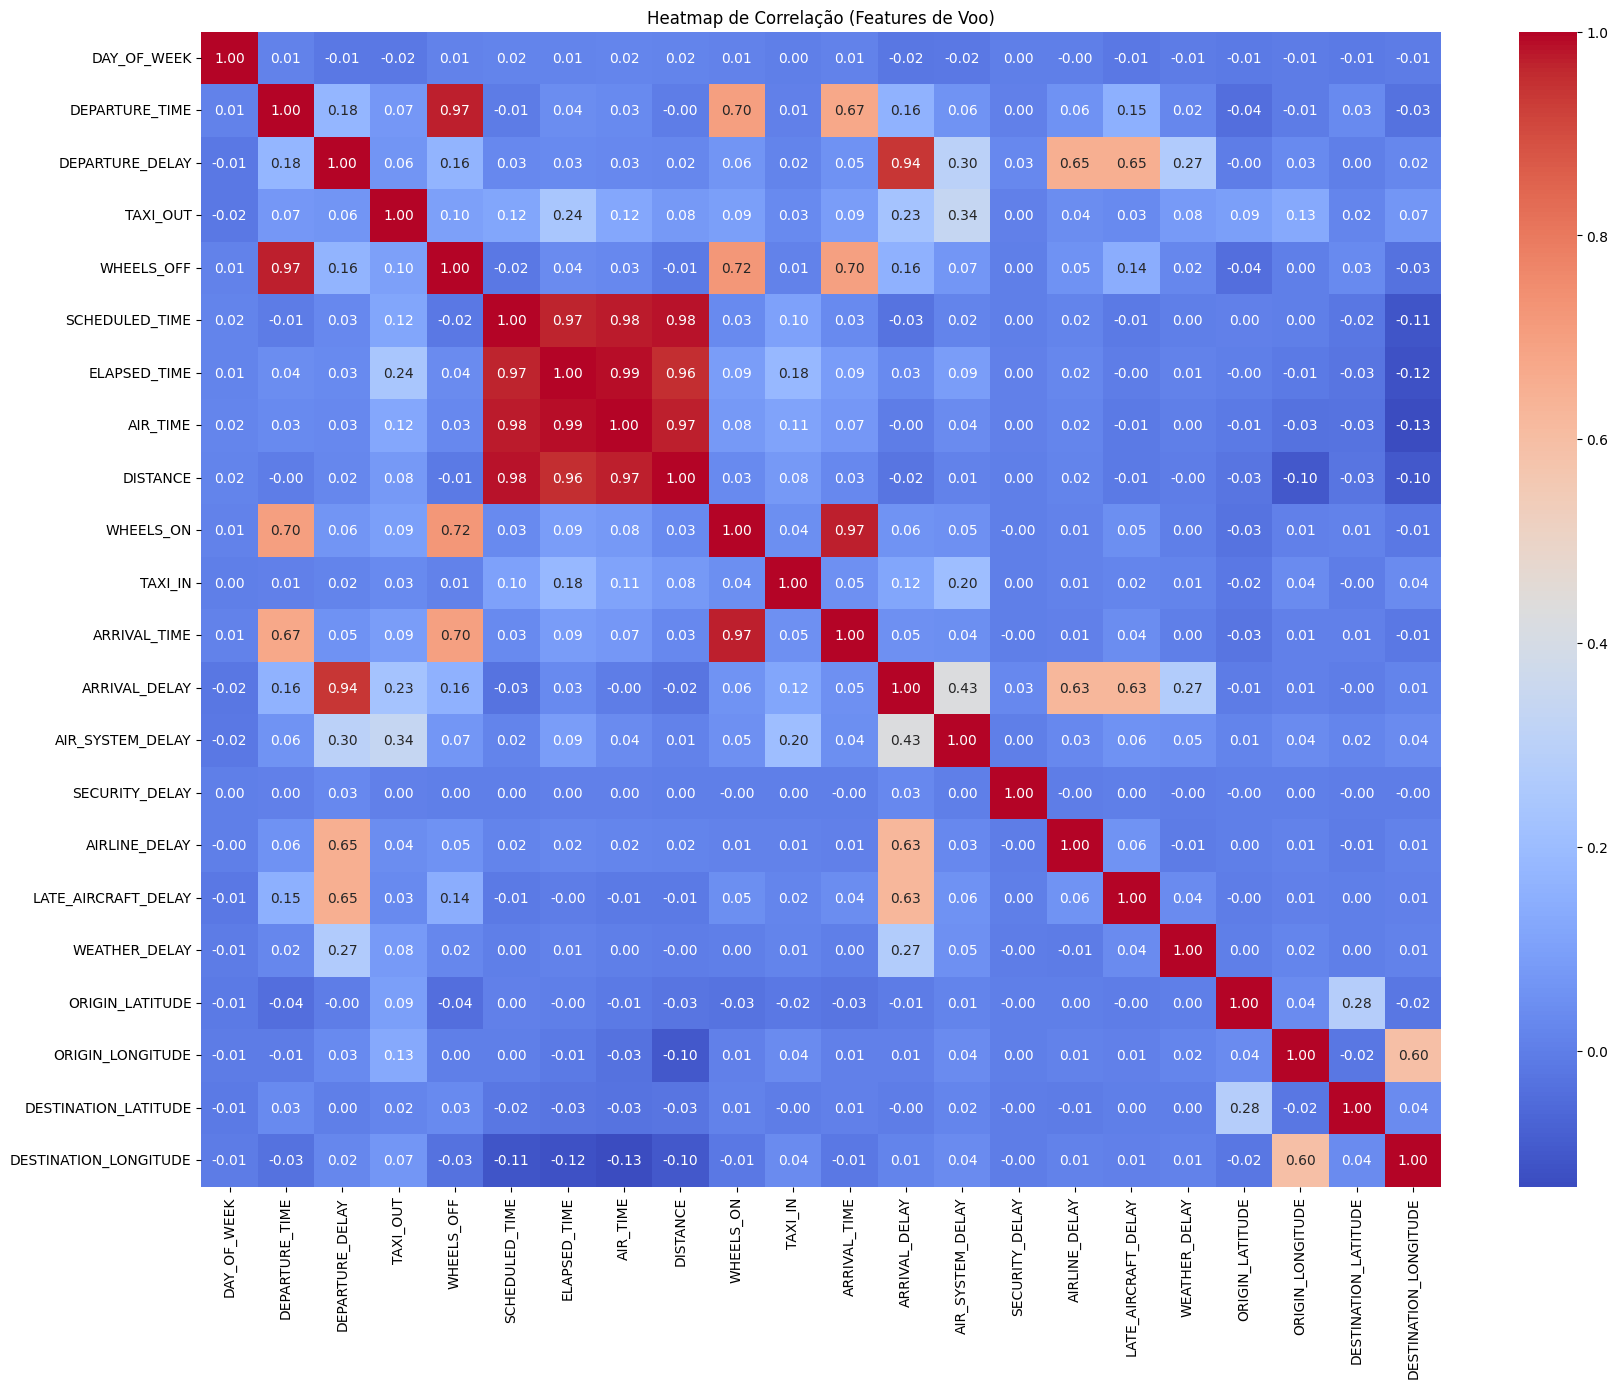

In [42]:
def correlation_mapping(data):
  """
  Gera um heatmap de correlação.
  """
  print("\nGerando Heatmap de Correlação...")
  df_flights_limpo = data.copy()

  # Remover colunas que não representam variáveis numéricas contínuas
  numeric_cols = df_flights_limpo.select_dtypes(include='number').columns.tolist()
  cols_to_remove = ['FLIGHT_NUMBER', 'DIVERTED', 'CANCELLED', 'SCHEDULED_DEPARTURE', 'SCHEDULED_ARRIVAL']
  plot_cols = [col for col in numeric_cols if col not in cols_to_remove]
  var_numerical = df_flights_limpo[plot_cols]

  plt.figure(figsize=(20, 15))
  corr = var_numerical.corr()
  sns.heatmap(corr,
              annot=True,
              fmt='.2f',
              cmap='coolwarm'
              )
  plt.title('Heatmap de Correlação (Features de Voo)')


correlation_mapping(df_flights_completo)

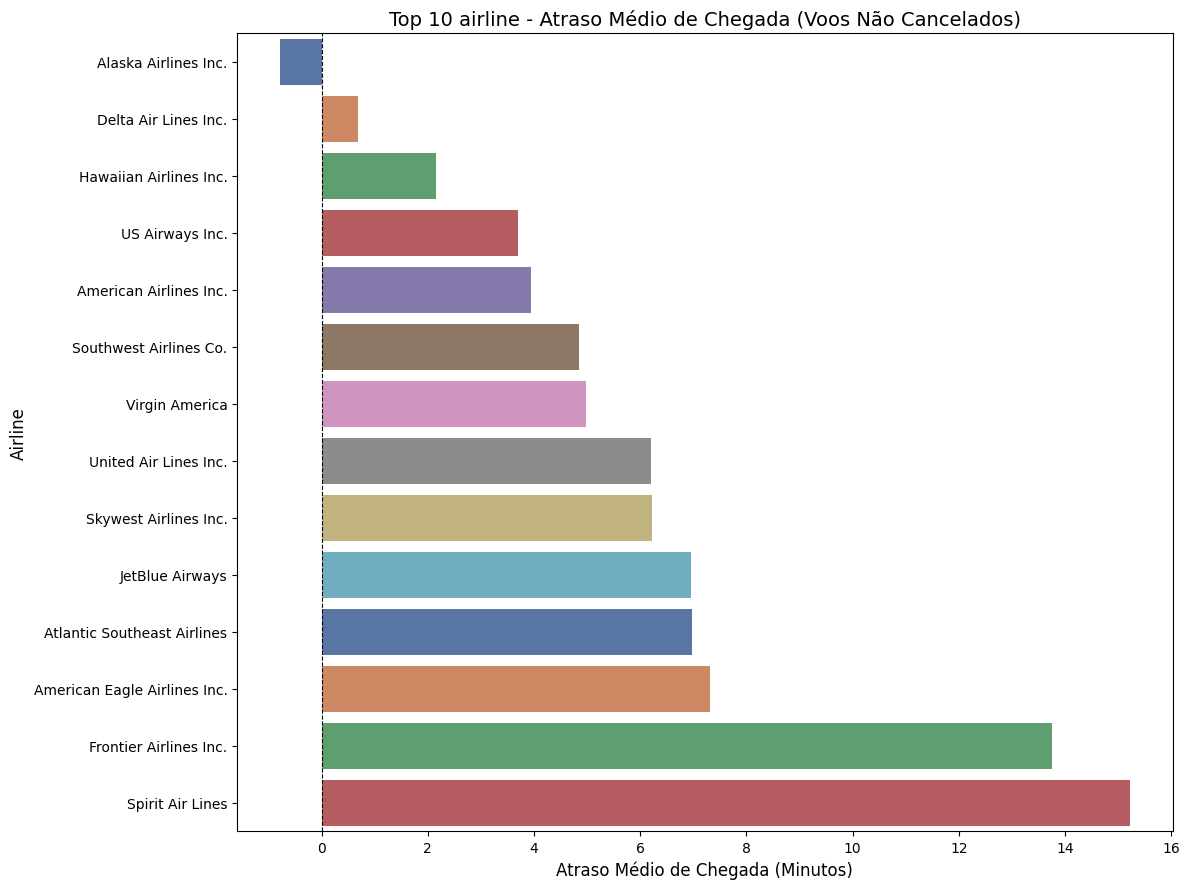

In [43]:
def plot_delay_by_airline(data):
  """
    Plota a Média delay por companhia

  """
  df_non_cancelled = data[data['CANCELLED'] == 0].copy()
  airline_delay = df_non_cancelled.groupby('AIRLINE_NAME')['ARRIVAL_DELAY'].mean().sort_values()

  plt.figure(figsize=(12, 9))
  sns.barplot(x=airline_delay.values, y=airline_delay.index, orient='h', palette='deep', hue=airline_delay.index, legend=False)
  plt.title('Top 10 airline - Atraso Médio de Chegada (Voos Não Cancelados)', fontsize=14)
  plt.xlabel('Atraso Médio de Chegada (Minutos)', fontsize=12)
  plt.ylabel('Airline', fontsize=12)
  plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8) # Linha vertical no 0
  plt.tight_layout()
  plt.show()

plot_delay_by_airline(df_flights_completo)

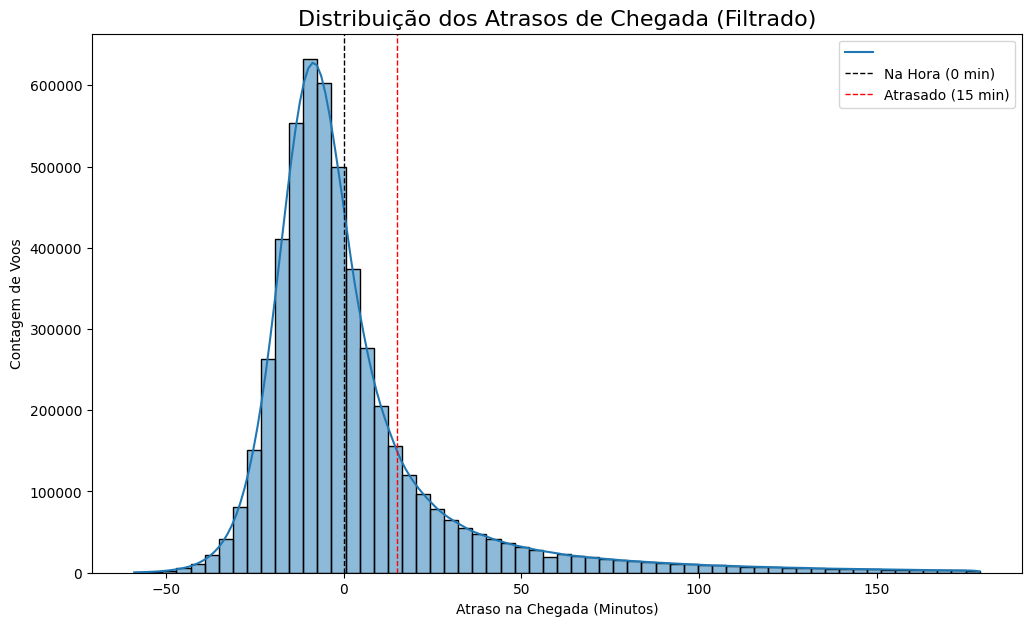

In [44]:
def plot_delay_histogram(data):
    """
    Plota um histograma dos atrasos de chegada (ARRIVAL_DELAY).
    Filtra valores extremos para melhor visualização.
    """

    # Filtra apenas voos não cancelados
    df_non_cancelled = data[data['CANCELLED'] == 0].copy()

    # Filtra valores extremos para visualização
    # (Ex: voos com mais de 3h de atraso ou 1h de adiantamento)
    df_plot = df_non_cancelled[
        (df_non_cancelled['ARRIVAL_DELAY'] > -60) &
        (df_non_cancelled['ARRIVAL_DELAY'] < 180)
    ]

    plt.figure(figsize=(12, 7))
    sns.histplot(df_plot['ARRIVAL_DELAY'], bins=60, kde=True) # kde=True desenha a linha de densidade

    plt.title('Distribuição dos Atrasos de Chegada (Filtrado)', fontsize=16)
    plt.xlabel('Atraso na Chegada (Minutos)')
    plt.ylabel('Contagem de Voos')
    plt.axvline(x=0, color='black', linestyle='--', linewidth=1) # Linha no 0
    plt.axvline(x=15, color='red', linestyle='--', linewidth=1)  # Linha de corte (15 min)
    plt.legend(['', 'Na Hora (0 min)', 'Atrasado (15 min)'])
    plt.show()

plot_delay_histogram(df_flights_completo)

C:\Users\igor_\AppData\Local\Temp\ipykernel_10352\2413858828.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


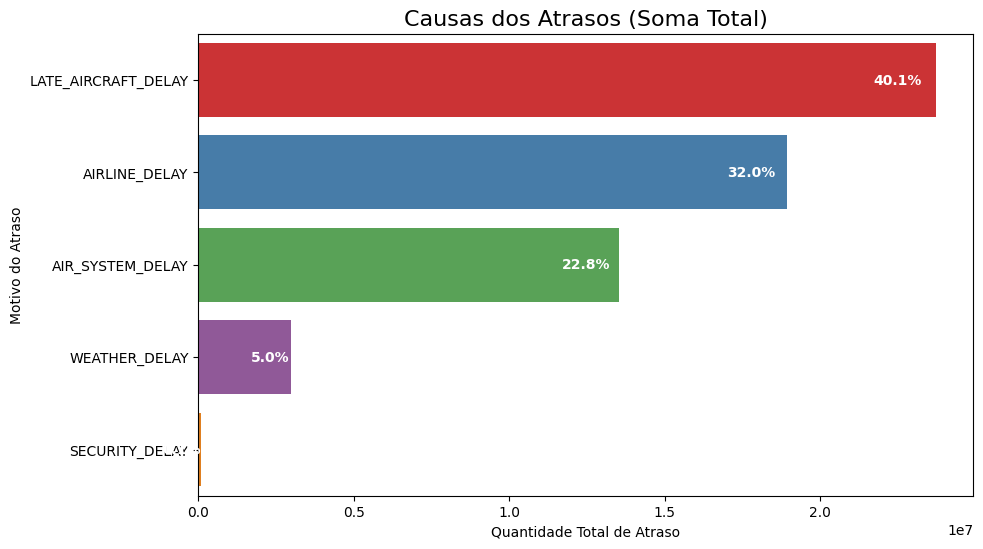

In [45]:
def plot_delay_components(data):
    """
    Plota um gráfico de barras empilhadas mostrando a contribuição
    de cada componente de atraso para o total.
    """

    df_flights_limpo = data.copy()

    delay_types = [
        'AIR_SYSTEM_DELAY',
        'SECURITY_DELAY',
        'AIRLINE_DELAY',
        'LATE_AIRCRAFT_DELAY',
        'WEATHER_DELAY'
    ]

    # Calcular a soma de cada tipo de atraso
    df_delay_sum = data[delay_types].sum().sort_values(ascending=False)

    # Converter para um DataFrame para plotar
    df_plot = df_delay_sum.reset_index()
    df_plot.columns = ['Tipo de Atraso', 'Quantidade Total (Soma)']

    # Calcular porcentagem
    df_plot['Porcentagem'] = (df_plot['Quantidade Total (Soma)'] / df_plot['Quantidade Total (Soma)'].sum()) * 100

    plt.figure(figsize=(10, 6))
    sns.barplot(
        data=df_plot,
        x='Quantidade Total (Soma)',
        y='Tipo de Atraso',
        palette='Set1'
    )

    plt.title('Causas dos Atrasos (Soma Total)', fontsize=16)
    plt.xlabel('Quantidade Total de Atraso')
    plt.ylabel('Motivo do Atraso')

    # Adicionar labels de porcentagem
    for index, row in df_plot.iterrows():
        plt.text(row['Quantidade Total (Soma)'] * 0.98, index,
                 f"{row['Porcentagem']:.1f}%",
                 color='white', ha='right', va='center', weight='bold')

    plt.show()

plot_delay_components(df_flights_completo)

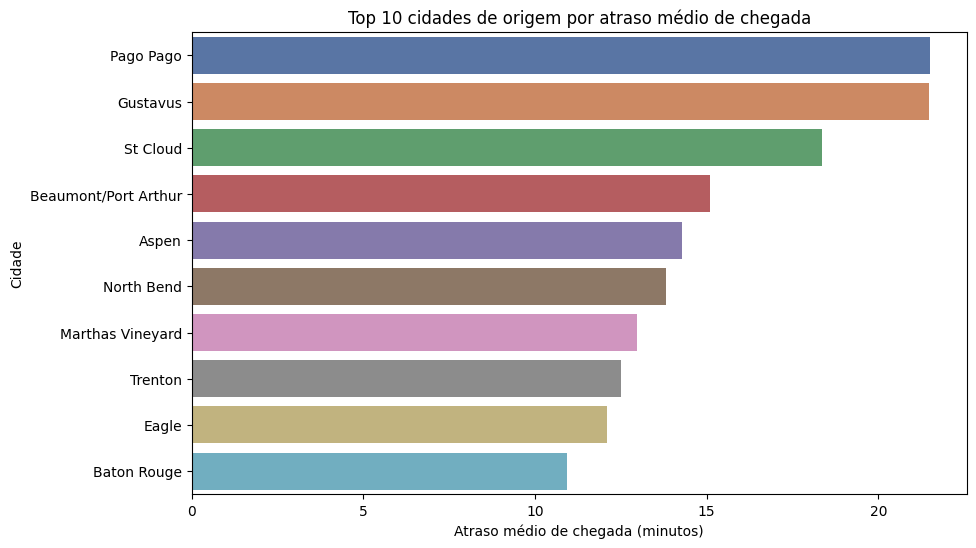

In [46]:
def average_flight_delay_cities(df_flights_completo):
    """
    Plota a média de atraso por cidade de origem (top 10).
    Utiliza a coluna 'ORIGIN_CITY'.
    """
    df_flights_completo = df_flights_completo.copy()

    city_delay = (df_flights_completo.groupby('ORIGIN_CITY')['ARRIVAL_DELAY'].mean()
                  .sort_values(ascending=False).head(10))

    plt.figure(figsize=(10, 6))
    sns.barplot(x=city_delay.values, y=city_delay.index, palette='deep', hue=city_delay.index, legend=False)
    plt.title('Top 10 cidades de origem por atraso médio de chegada')
    plt.xlabel('Atraso médio de chegada (minutos)')
    plt.ylabel('Cidade')
    plt.show()

average_flight_delay_cities(df_flights_completo)

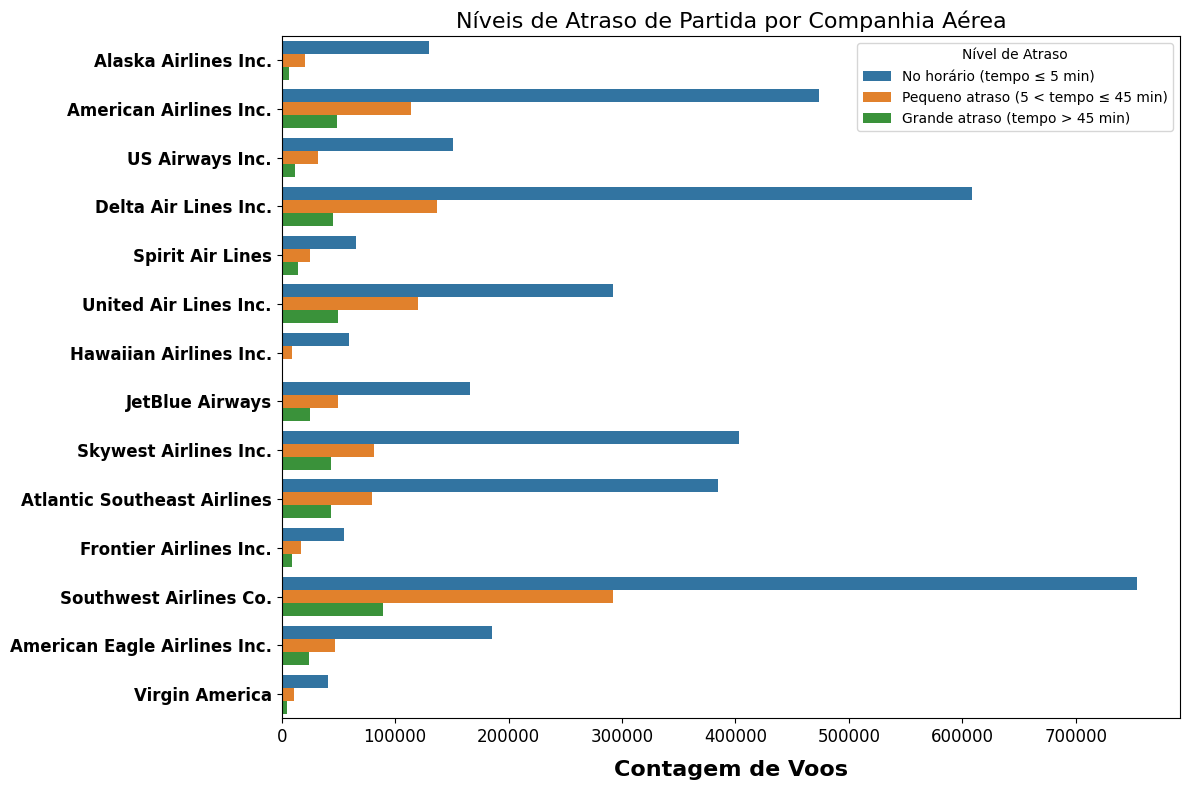

In [47]:
def plot_delay_levels_by_airline(data):
    """
    Cria um gráfico de barras que mostra a contagem de voos por companhia aérea,
    categorizados por níveis de atraso na partida.
    """
    
    # Filtra voos não cancelados para a análise de atrasos
    df_plot = data[data['CANCELLED'] == 0].copy()



    # Função que define como os atrasos são agrupados:
    # 0: no horário (atraso <= 5 min ou adiantado)
    # 1: pequeno atraso (5 < atraso <= 45 min)
    # 2: grande atraso (atraso > 45 min)
    delay_type = lambda x: ((0, 1)[x > 5], 2)[x > 45]
    df_plot['DELAY_LEVEL'] = df_plot['DEPARTURE_DELAY'].apply(delay_type)

    plt.figure(figsize=(12, 8))
    ax = sns.countplot(y="AIRLINE_NAME", hue='DELAY_LEVEL', data=df_plot, palette='tab10')

    plt.setp(ax.get_xticklabels(), fontsize=12, weight = 'normal', rotation = 0)
    plt.setp(ax.get_yticklabels(), fontsize=12, weight = 'bold', rotation = 0)
    ax.yaxis.label.set_visible(False) # Remove o label 'AIRLINE_NAME' do eixo Y
    plt.xlabel('Contagem de Voos', fontsize=16, weight = 'bold', labelpad=10)
    plt.title('Níveis de Atraso de Partida por Companhia Aérea', fontsize=16)

    # Define a legenda
    L = plt.legend(title='Nível de Atraso')
    L.get_texts()[0].set_text('No horário (tempo ≤ 5 min)')
    L.get_texts()[1].set_text('Pequeno atraso (5 < tempo ≤ 45 min)')
    L.get_texts()[2].set_text('Grande atraso (tempo > 45 min)')
    plt.tight_layout()
    plt.show()

plot_delay_levels_by_airline(df_flights_completo)

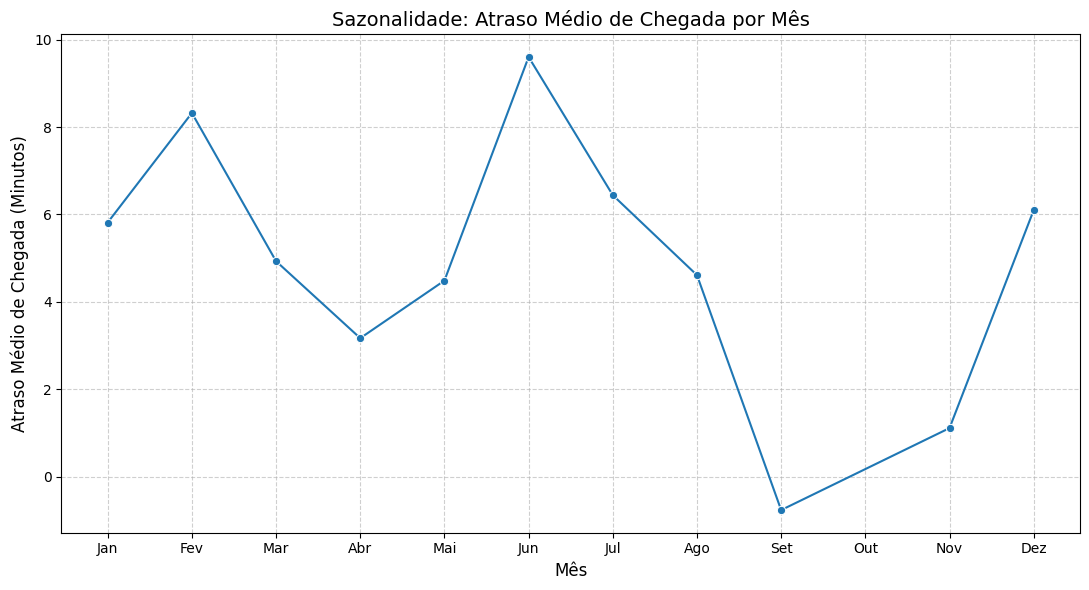

In [48]:
def sazonalidade(data):

  df_non_cancelled = df_flights_completo[df_flights_completo['CANCELLED'] == 0].copy()
  df_non_cancelled['MONTH'] = df_non_cancelled['FLIGHT_DATE'].dt.month

    # Agrupar por mês e calcular o atraso médio
  month_delay = df_non_cancelled.groupby('MONTH')['ARRIVAL_DELAY'].mean()

    # Mapear números dos meses para nomes abreviados
  month_map = {
        1: 'Jan', 2: 'Fev', 3: 'Mar', 4: 'Abr', 5: 'Mai', 6: 'Jun',
        7: 'Jul', 8: 'Ago', 9: 'Set', 10: 'Out', 11: 'Nov', 12: 'Dez'
    }
  month_delay.index = month_delay.index.map(month_map)

    # Reordenar
  month_delay = month_delay.reindex(month_map.values())

  plt.figure(figsize=(11, 6))
  # Usar 'lineplot' do seaborn para mostrar a tendência ao longo do tempo
  sns.lineplot(x=month_delay.index, y=month_delay.values, marker='o')
  plt.title('Sazonalidade: Atraso Médio de Chegada por Mês', fontsize=14)
  plt.xlabel('Mês', fontsize=12)
  plt.ylabel('Atraso Médio de Chegada (Minutos)', fontsize=12)
  plt.grid(True, linestyle='--', alpha=0.6) # Adiciona um grid leve
  plt.tight_layout()
  plt.show()

sazonalidade(df_flights_completo)

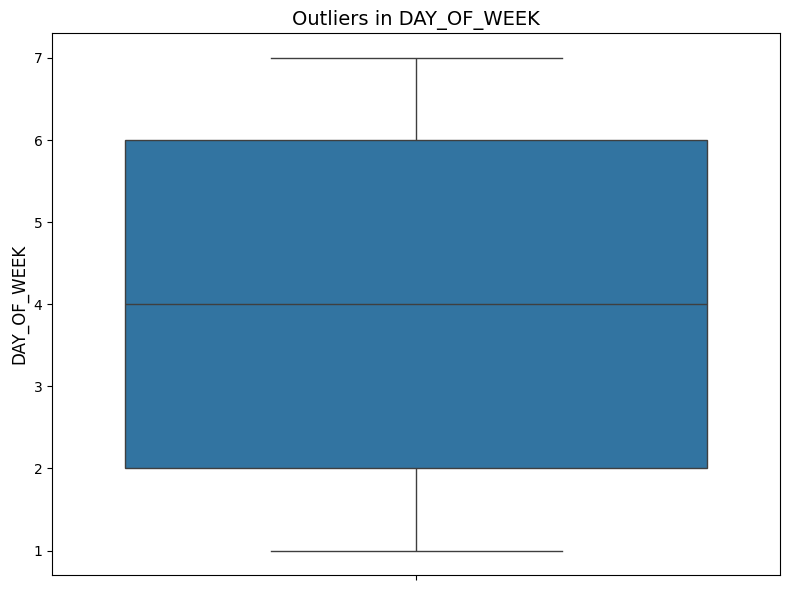

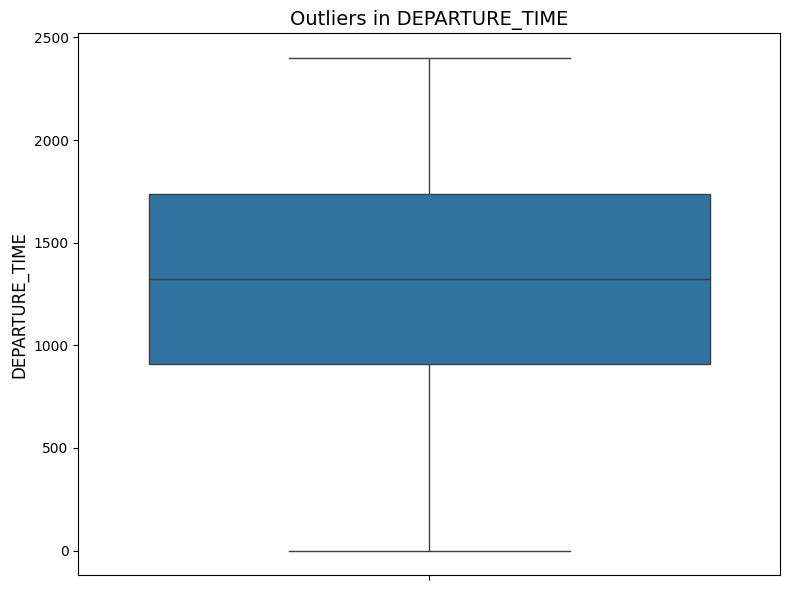

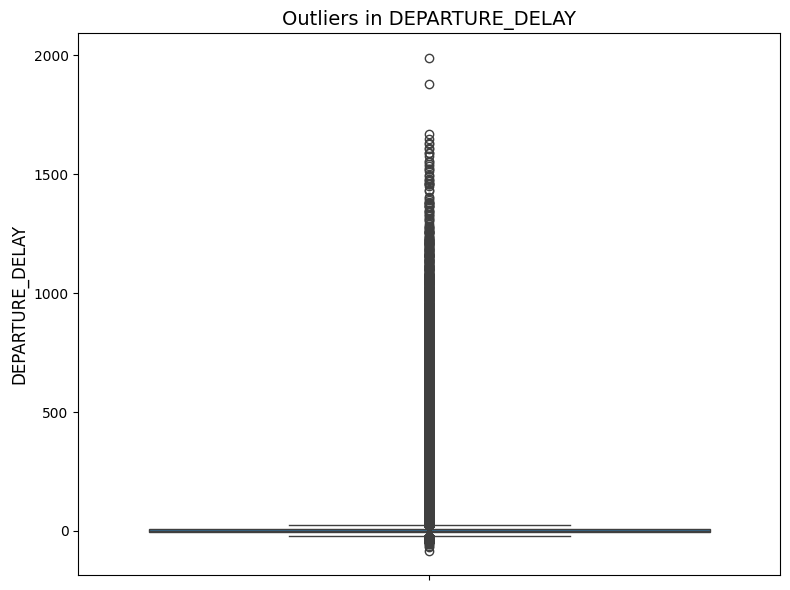

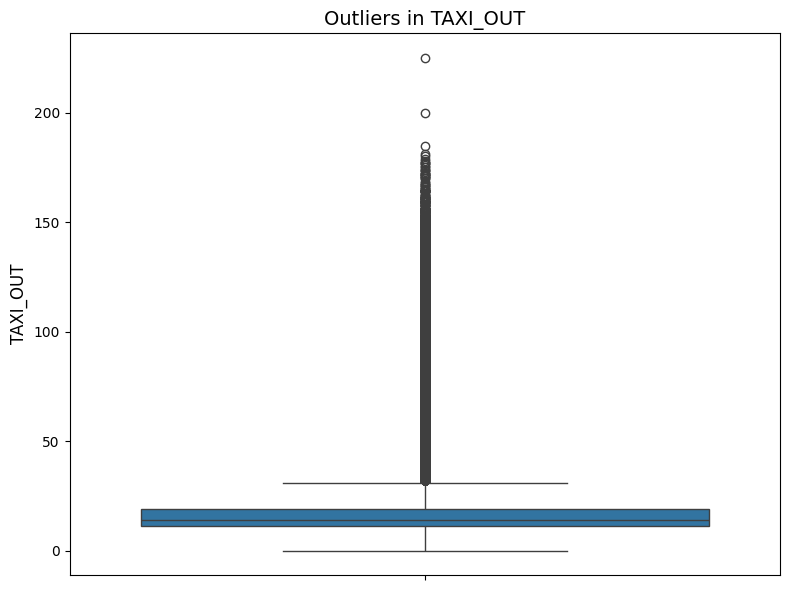

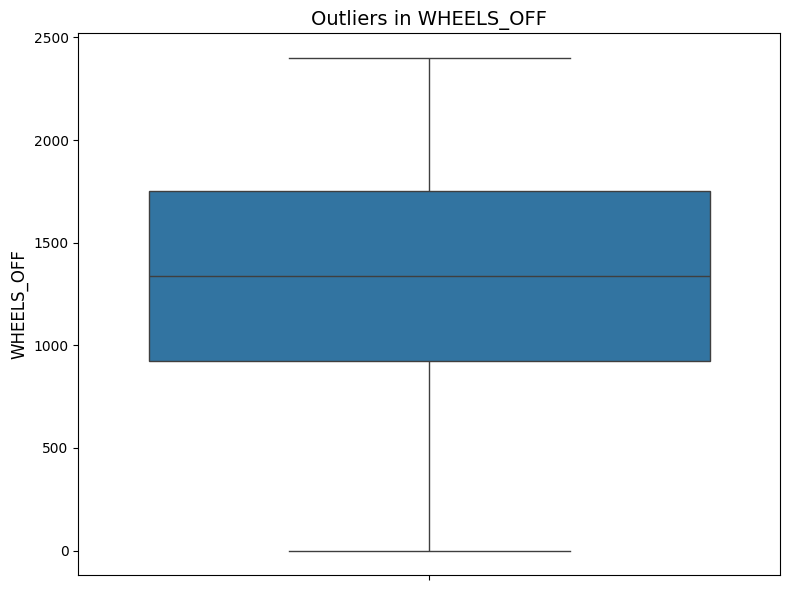

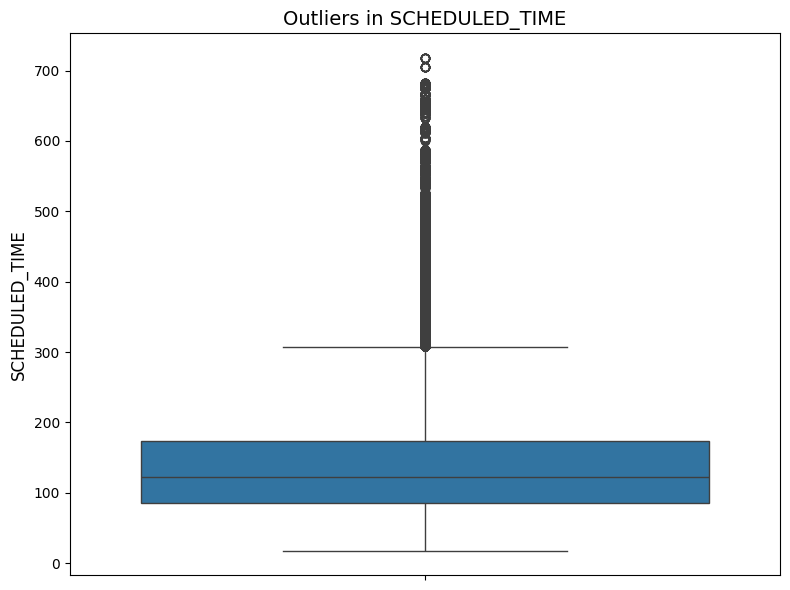

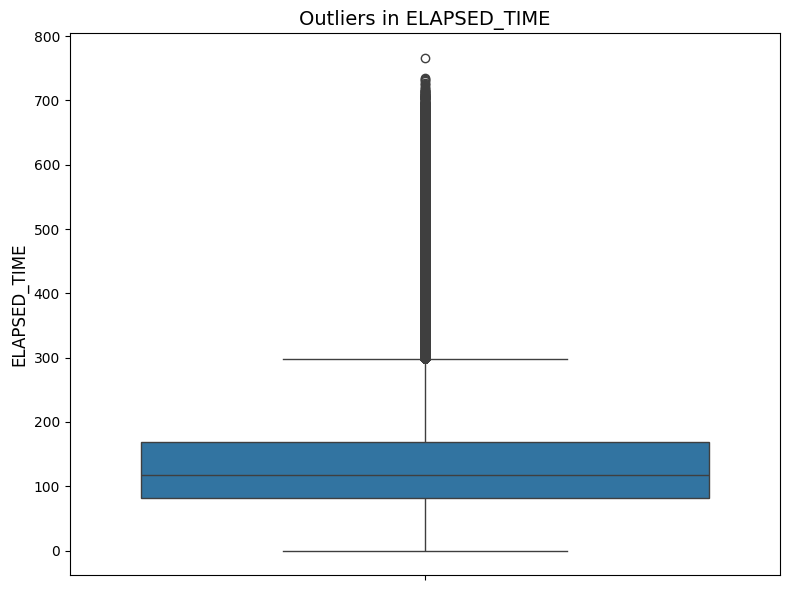

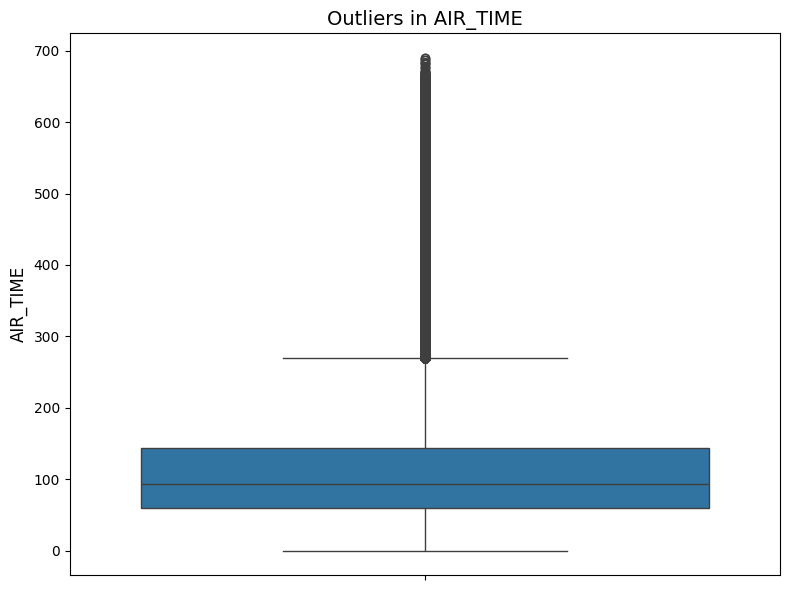

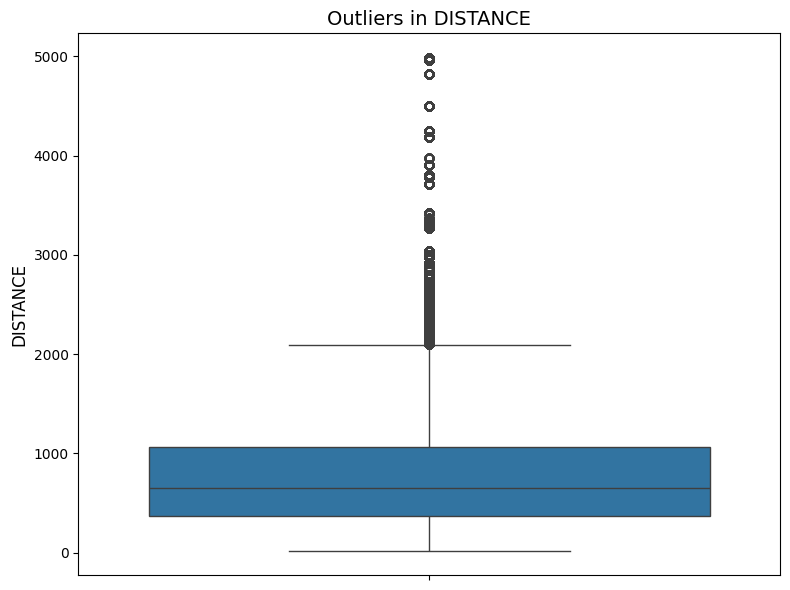

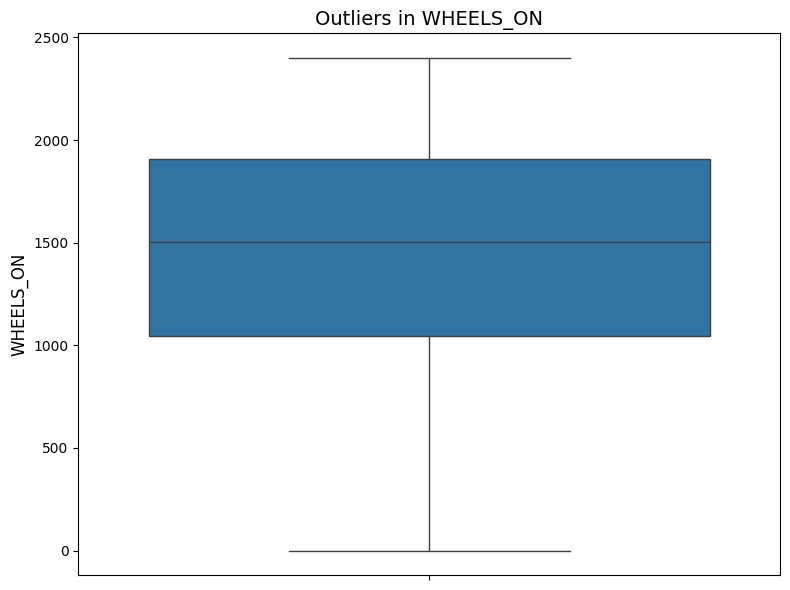

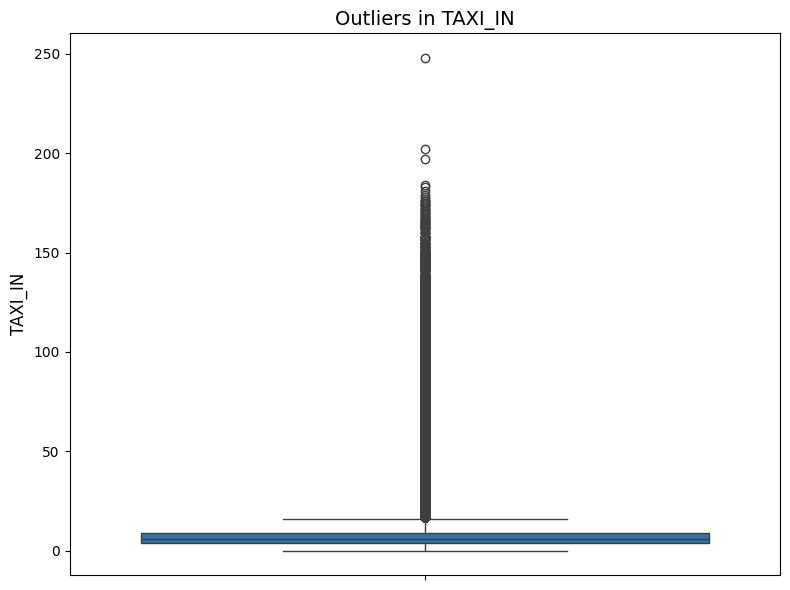

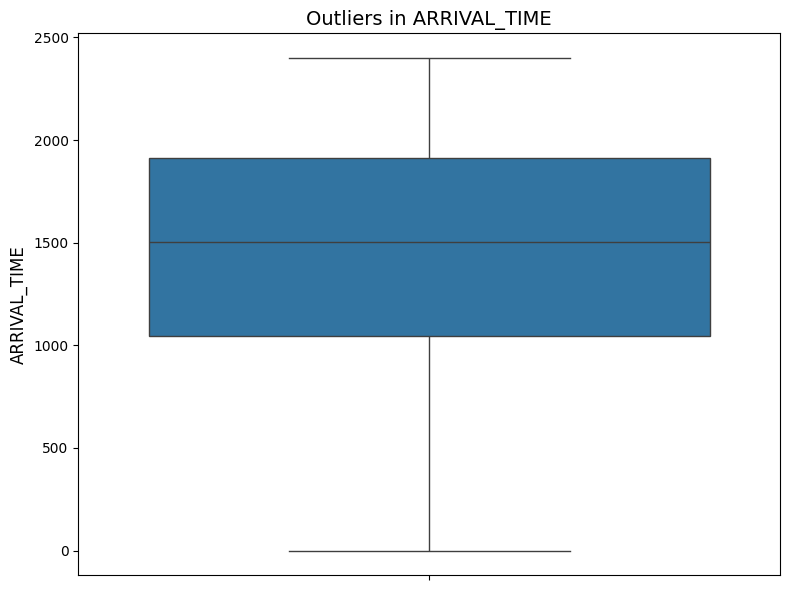

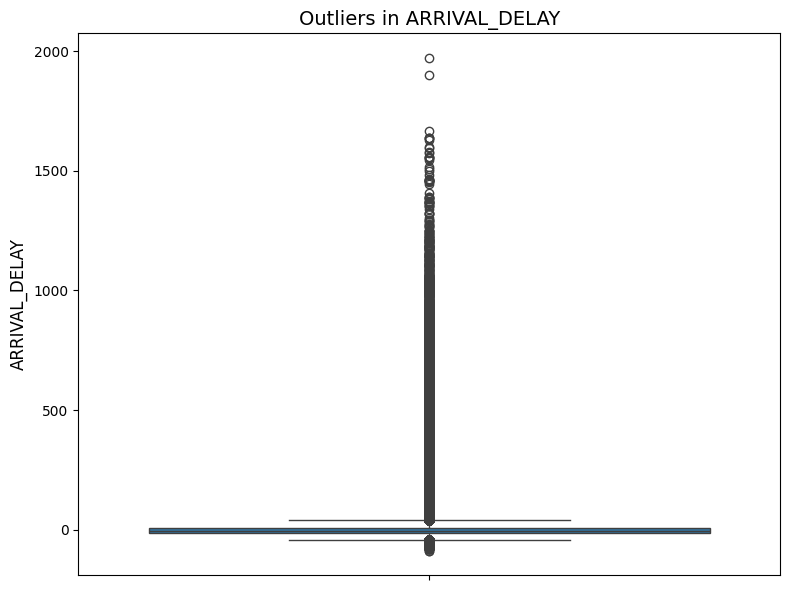

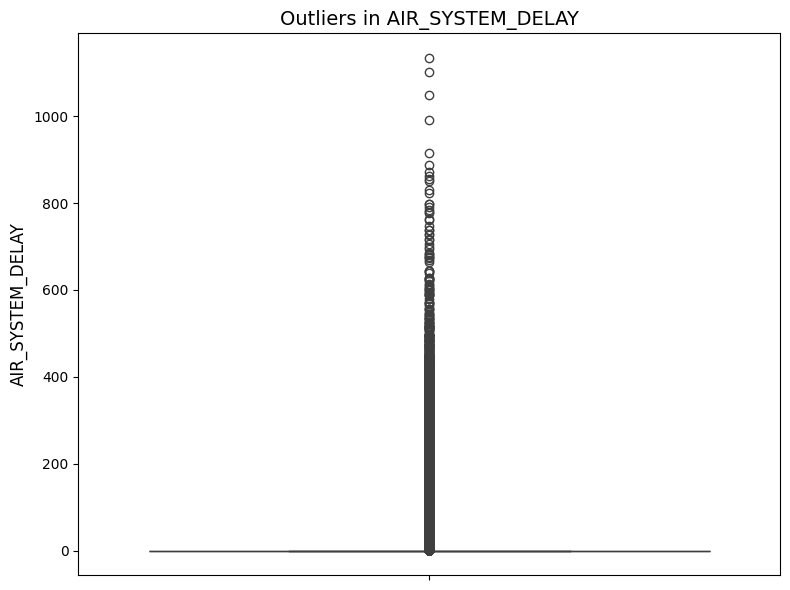

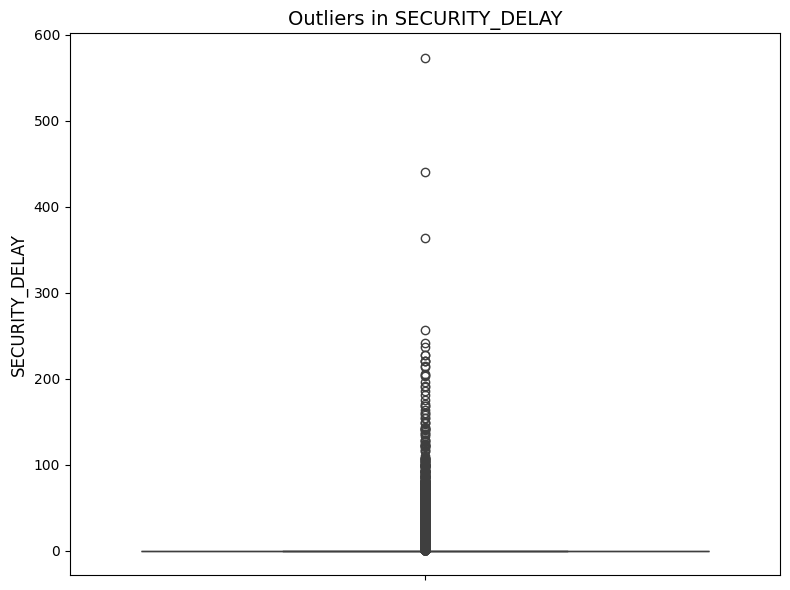

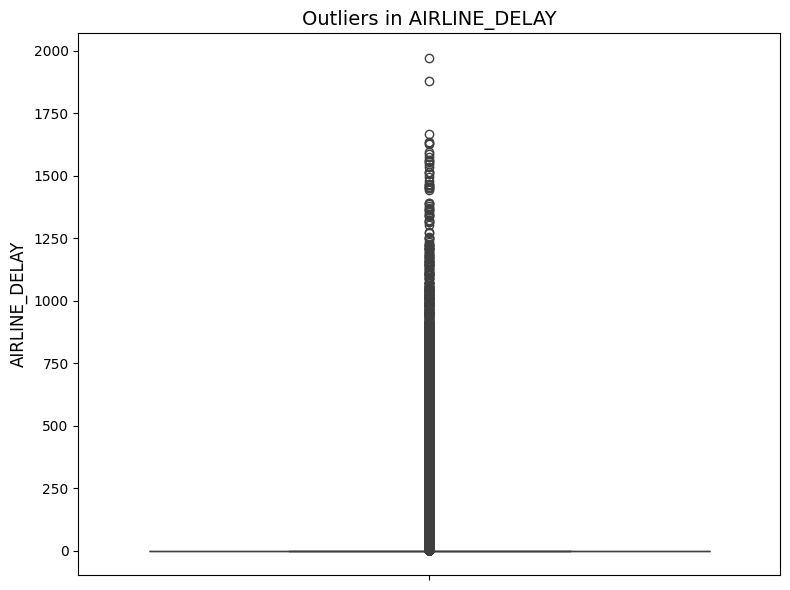

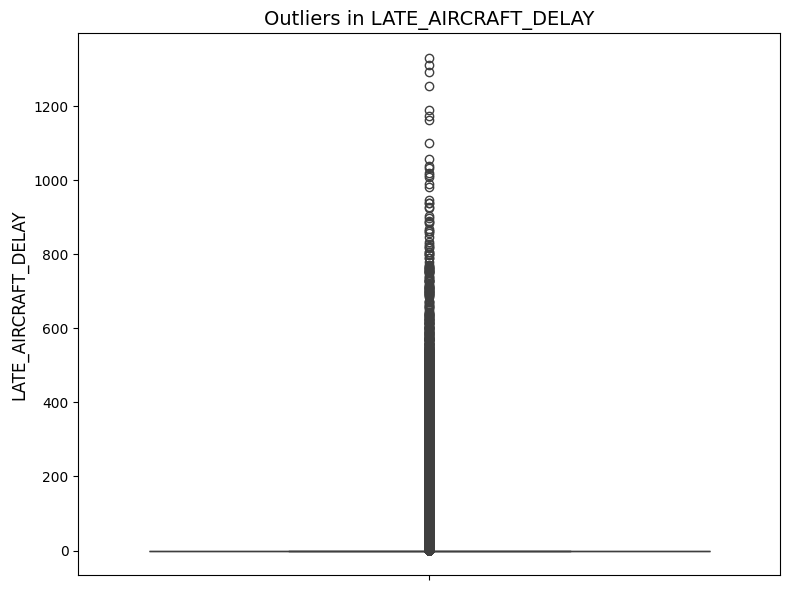

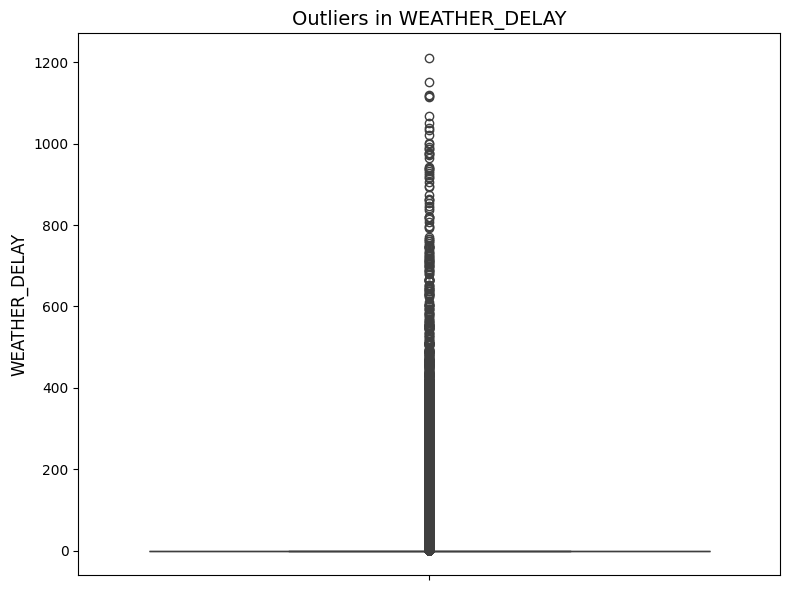

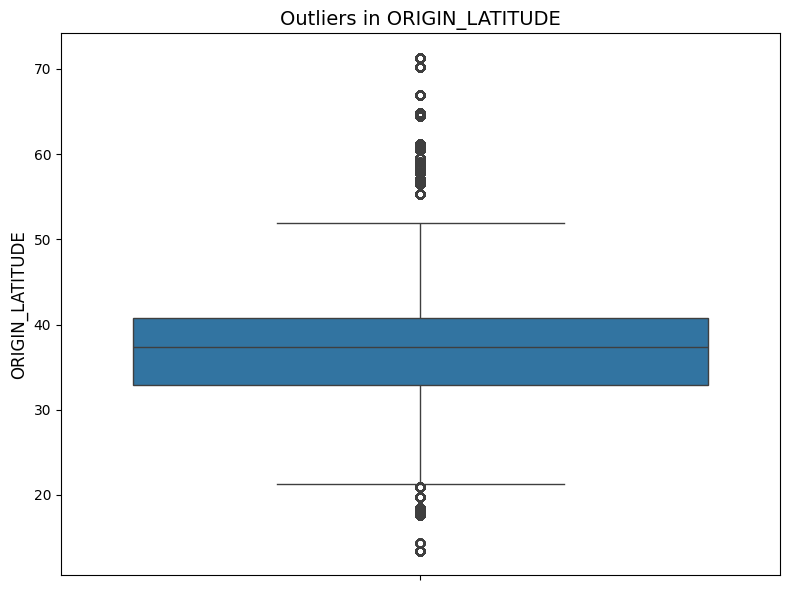

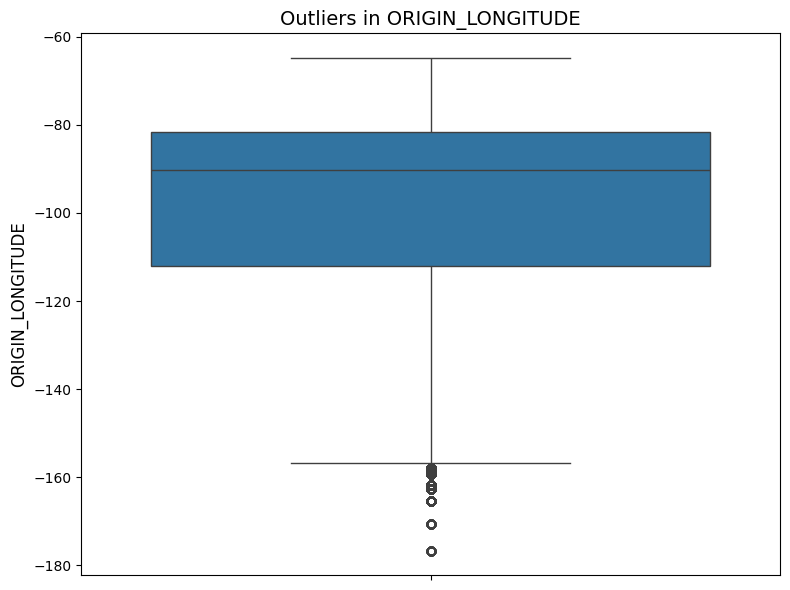

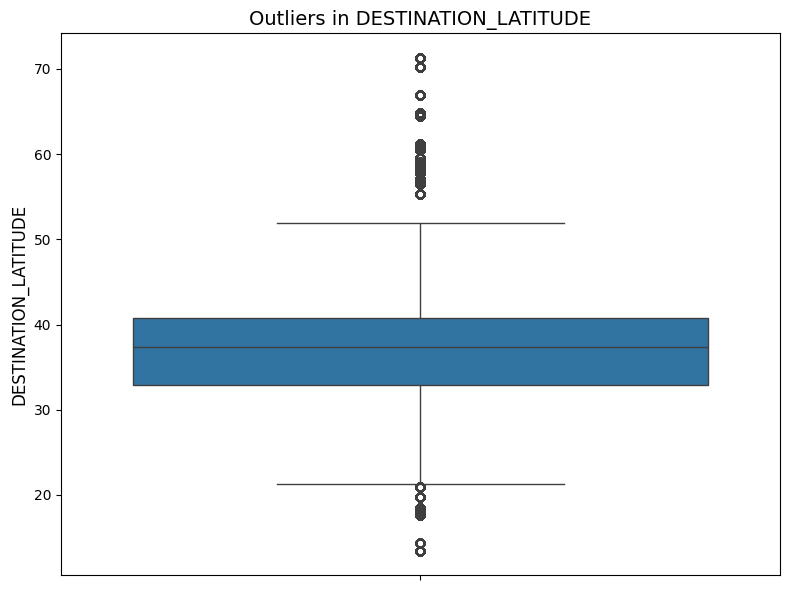

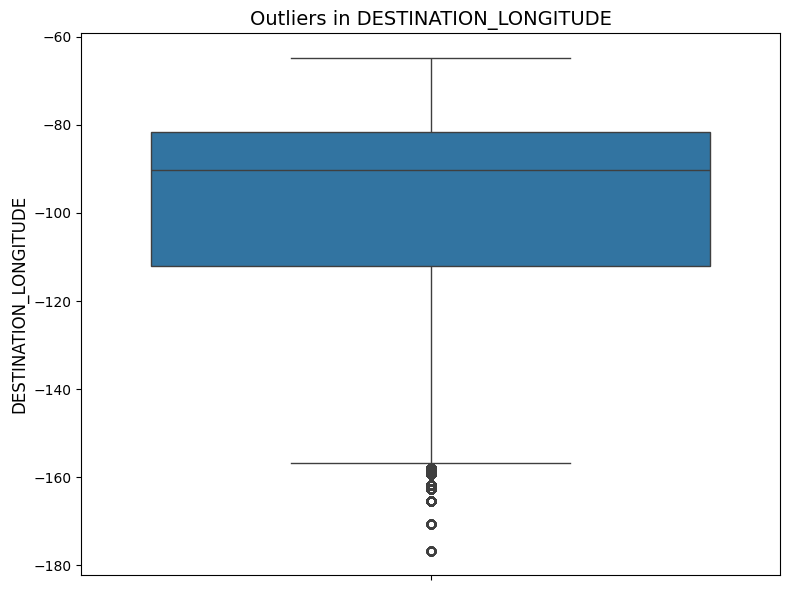

In [49]:
def plot_outliers(data) :
  """
  Plots boxplots de colunas numericas para visualizar outliers.

  """

  df_flights_limpo = data.copy()

  numeric_cols = df_flights_limpo.select_dtypes(include='number').columns.tolist()
  cols_to_remove = ['FLIGHT_NUMBER', 'DIVERTED', 'CANCELLED', 'SCHEDULED_DEPARTURE', 'SCHEDULED_ARRIVAL']
  # Filtrar colunas numéricas, garantindo que as colunas plotadas sejam usados para plotagem real
  plot_cols = [col for col in numeric_cols if col not in cols_to_remove]

  # Loop através das colunas numéricas filtradas e cria um boxplot para cada
  for col in plot_cols:
     plt.figure(figsize=(8, 6))
     sns.boxplot(y=df_flights_limpo[col]) 
     plt.title(f'Outliers in {col}', fontsize=14)
     plt.ylabel(col, fontsize=12)
     plt.tight_layout()
     plt.show()

plot_outliers(df_flights_completo)


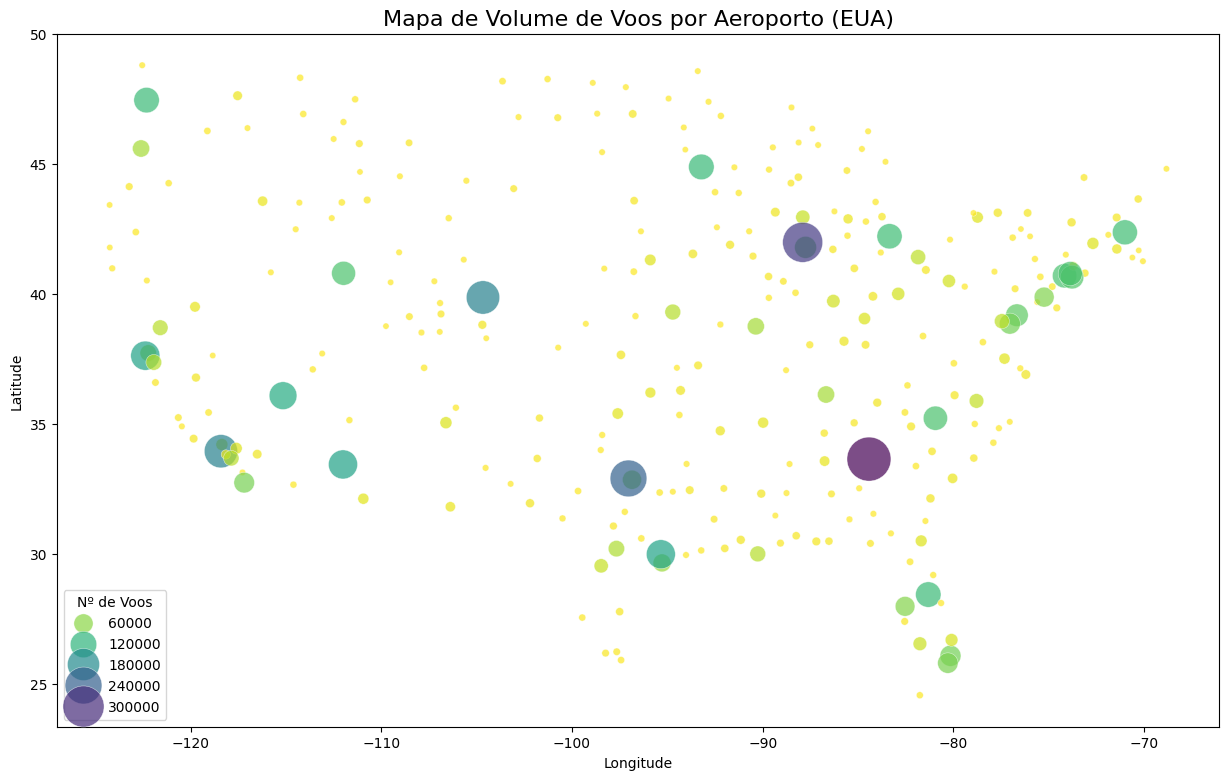

In [50]:
def plot_airport_volume_map(data_flights, data_airports):
    """
    Plota um 'mapa' (scatter plot) de aeroportos.
    O tamanho e a cor dos pontos são baseados no volume de voos.
    """

    # Contar os voos por aeroporto de origem
    count_flights_df = data_flights['ORIGIN_AIRPORT'].value_counts().reset_index()
    count_flights_df.columns = ['IATA_CODE', 'flight_count'] # Renomear colunas

    # Juntar contagem de voos com dados dos aeroportos (Lat/Lon)
    df_map = pd.merge(data_airports, count_flights_df, on='IATA_CODE')

    # Filtrar para os EUA (Continente) ---
    df_plot = df_map.query('24 < LATITUDE < 50 and -130 < LONGITUDE < -65')

    

    plt.figure(figsize=(15, 9))

    sns.scatterplot(
        data=df_plot,
        x='LONGITUDE',
        y='LATITUDE',
        hue='flight_count',   # Cor baseada na contagem (substitui 'colors' e 'ind')
        size='flight_count',  # Tamanho baseado na contagem (substitui 'markersize')

        # Configurações extras
        palette='viridis_r',  # Paleta de cores
        sizes=(20, 1000),     # Define o tamanho mínimo e máximo do ponto
        alpha=0.7             # Transparência
    )

    plt.title('Mapa de Volume de Voos por Aeroporto (EUA)', fontsize=16)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')

    plt.legend(title='Nº de Voos')
    plt.show()

plot_airport_volume_map(df_flights_completo, df_airports)

### 2. Engenharia de Features e Preparação para Modelagem

Criação de uma amostra dos dados para agilizar o treinamento e definição da variável alvo `DELAYED`. Em seguida, as features são selecionadas, as variáveis categóricas são codificadas usando One-Hot Encoding e as variáveis numéricas são escaladas.

In [51]:
def column_outliers_mask(df, col):
    """
    Returns a boolean mask marking outliers in a single numeric column using IQR.
    """
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return (df[col] < lower) | (df[col] > upper)

In [52]:
def statistical_features(data):
  df = data.copy()
  stats = {}

  var_numerical = df.select_dtypes(include='number').columns # not index, wanna the columns
  categorical_vars = df.select_dtypes(include=['object','category']).columns

  for col in var_numerical:
    stats[col] = {
        'mean' : df[col].mean(),
        'std' : df[col].std(),
        'median' : df[col].median(),
        'var' : df[col].var()
    }

    stats_df = pd.DataFrame(stats).T # Transpose matrix to be more readable

  return stats_df

df_stats = statistical_features(df_flights_completo)

df_stats

,mean,std,median,var
DAY_OF_WEEK,3.92,1.99,4.00,3.97
FLIGHT_NUMBER,2180.42,1762.03,1691.00,3104739.10
SCHEDULED_DEPARTURE,1330.26,484.32,1325.00,234565.67
DEPARTURE_TIME,1318.56,517.02,1324.00,267313.59
DEPARTURE_DELAY,9.61,37.26,-1.00,1388.16
TAXI_OUT,15.88,9.11,14.00,83.03
WHEELS_OFF,1339.40,520.10,1336.00,270499.23
SCHEDULED_TIME,141.75,75.23,123.00,5659.04
ELAPSED_TIME,135.38,75.53,117.00,5704.38
AIR_TIME,112.17,73.04,93.00,5334.56


In [53]:
def outliers_detection_and_removal(data):
  """Detecta e remove outliers usando o método IQR - modelagem."""

  df = data.copy()
  size_df = len(df)

  var_numerical = df.select_dtypes(include='number').columns
  outliers_info = {}

  # Inicializa a máscara de outliers
  outliers_mask = pd.Series(False, index=df.index)

  for col in var_numerical:

    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

    IQR = Q3 - Q1

    lower_bounder = Q1 - 1.5 * IQR
    upper_bounder = Q3 + 1.5 * IQR

    mask = (df[col] < lower_bounder) | (df[col] > upper_bounder)
    outliers_mask |= mask # Atualiza a máscara cumulativa para outliers

    outliers_info[col] = {
        'Q1' : Q1,
        'Q3' : Q3,
        'IQR' : IQR,
        'Lower Bounder' : lower_bounder,
        'Upper Bounder' : upper_bounder,
        'Count' : mask.sum(),
        'Outliers percent' : mask.sum()/size_df * 100
        }

  # Cria o DataFrame de informações de outliers e o DataFrame limpo FORA do loop
  df_outliers_info = pd.DataFrame(outliers_info).T
  df_outliers = df[~outliers_mask] # Filtra o DataFrame original usando a máscara cumulativa

  return df_outliers_info , df_outliers

df_out_info, df_cleaned = outliers_detection_and_removal(df_flights_completo)

In [54]:
df_out_info

,Q1,Q3,IQR,Lower Bounder,Upper Bounder,Count,Outliers percent
DAY_OF_WEEK,2.00,6.00,4.00,-4.00,12.00,0.00,0.00
FLIGHT_NUMBER,731.00,3257.00,2526.00,-3058.00,7046.00,24766.00,0.47
SCHEDULED_DEPARTURE,917.00,1730.00,813.00,-302.50,2949.50,0.00,0.00
DEPARTURE_TIME,910.00,1738.00,828.00,-332.00,2980.00,0.00,0.00
DEPARTURE_DELAY,-5.00,7.00,12.00,-23.00,25.00,691745.00,13.06
TAXI_OUT,11.00,19.00,8.00,-1.00,31.00,262543.00,4.96
WHEELS_OFF,925.00,1752.00,827.00,-315.50,2992.50,0.00,0.00
SCHEDULED_TIME,85.00,174.00,89.00,-48.50,307.50,266435.00,5.03
ELAPSED_TIME,81.00,168.00,87.00,-49.50,298.50,263120.00,4.97
AIR_TIME,59.00,143.00,84.00,-67.00,269.00,275541.00,5.20


In [55]:
df_cleaned.describe()

,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,FLIGHT_DATE,ORIGIN_LATITUDE,ORIGIN_LONGITUDE,DESTINATION_LATITUDE,DESTINATION_LONGITUDE
count,3516998.00,3516998.00,3516998.00,3516998.00,3516998.00,3516998.00,3516998.00,3516998.00,3516998.00,3516998.00,3516998.00,3516998.00,3516998.00,3516998.00,3516998.00,3516998.00,3516998.00,3516998.00,3516998.00,3516998.00,3516998.00,3516998.00,3516998.00,3516998,3516998.00,3516998.00,3516998.00,3516998.00
mean,3.94,2283.29,1291.80,1286.54,-1.25,14.40,1308.70,127.51,120.32,99.45,707.51,1446.54,6.47,1463.67,1452.88,-8.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2015-06-24 06:57:35.572053504,36.72,-94.39,36.79,-94.09
min,1.00,1.00,1.00,1.00,-23.00,1.00,1.00,30.00,16.00,8.00,62.00,1.00,1.00,1.00,1.00,-44.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2015-01-01 00:00:00,24.56,-124.25,24.56,-124.25
25%,2.00,841.00,900.00,857.00,-5.00,11.00,911.00,85.00,79.00,59.00,369.00,1042.00,4.00,1055.00,1046.00,-15.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2015-03-30 00:00:00,33.37,-104.67,33.43,-104.67
50%,4.00,1816.00,1250.00,1249.00,-3.00,13.00,1301.00,116.00,110.00,88.00,606.00,1434.00,6.00,1445.00,1438.00,-8.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2015-06-19 00:00:00,36.20,-90.26,37.24,-89.98
75%,6.00,3415.00,1704.00,1702.00,1.00,17.00,1716.00,160.00,152.00,131.00,965.00,1838.00,8.00,1848.00,1842.00,-2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2015-09-09 00:00:00,40.79,-82.53,40.79,-81.85
max,7.00,6899.00,2359.00,2400.00,25.00,31.00,2400.00,307.00,298.00,269.00,2092.00,2400.00,16.00,2359.00,2400.00,14.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2015-12-31 00:00:00,48.79,-68.83,48.79,-68.83
std,1.99,1729.54,478.36,481.71,6.67,5.27,481.75,53.89,52.33,51.48,432.19,490.70,3.01,493.92,492.91,10.18,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,5.18,15.26,5.17,15.25


In [56]:
df_cleaned.head()

,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,IATA_CODE,AIRLINE_NAME,FLIGHT_DATE,ORIGIN_LATITUDE,ORIGIN_LONGITUDE,ORIGIN_CITY,ORIGIN_STATE,DESTINATION_LATITUDE,DESTINATION_LONGITUDE,DESTINATION_CITY,DESTINATION_STATE
5,4,DL,806,N3730B,SFO,MSP,25,20,-5,18,38,217,230,206,1589,604,6,602,610,8,0,0,0,0,0,0,0,0,DL,Delta Air Lines Inc.,2015-01-01,37.62,-122.37,San Francisco,CA,44.88,-93.22,Minneapolis,MN
6,4,NK,612,N635NK,LAS,MSP,25,19,-6,11,30,181,170,154,1299,504,5,526,509,-17,0,0,0,0,0,0,0,0,NK,Spirit Air Lines,2015-01-01,36.08,-115.15,Las Vegas,NV,44.88,-93.22,Minneapolis,MN
8,4,AA,1112,N3LAAA,SFO,DFW,30,19,-11,17,36,195,193,173,1464,529,3,545,532,-13,0,0,0,0,0,0,0,0,AA,American Airlines Inc.,2015-01-01,37.62,-122.37,San Francisco,CA,32.90,-97.04,Dallas-Fort Worth,TX
9,4,DL,1173,N826DN,LAS,ATL,30,33,3,12,45,221,203,186,1747,651,5,711,656,-15,0,0,0,0,0,0,0,0,DL,Delta Air Lines Inc.,2015-01-01,36.08,-115.15,Las Vegas,NV,33.64,-84.43,Atlanta,GA
10,4,DL,2336,N958DN,DEN,ATL,30,24,-6,12,36,173,149,133,1199,449,4,523,453,-30,0,0,0,0,0,0,0,0,DL,Delta Air Lines Inc.,2015-01-01,39.86,-104.67,Denver,CO,33.64,-84.43,Atlanta,GA


In [57]:
def get_part_of_day(time_int):
    """Converte um horário HHMM (int) em uma categoria de período do dia."""
    # Garante que é um inteiro
    time_int = int(time_int)

    if 500 <= time_int <= 1159:
        return 'Manhã' # (5:00 - 11:59)
    elif 1200 <= time_int <= 1759:
        return 'Tarde' # (12:00 - 17:59)
    elif 1800 <= time_int <= 2259:
        return 'Noite' # (18:00 - 22:59)
    else:
        return 'Madrugada' # (23:00 - 4:59)

In [58]:
# Aplicando a função para criar a nova coluna
df_cleaned['PART_OF_DAY_DEPARTURE'] = df_cleaned['SCHEDULED_DEPARTURE'].apply(get_part_of_day)
df_cleaned['PART_OF_DAY_ARRIVAL'] = df_cleaned['SCHEDULED_ARRIVAL'].apply(get_part_of_day)

In [59]:
df_cleaned['MONTH'] = df_cleaned['FLIGHT_DATE'].dt.month.astype(str)
df_cleaned['ARRIVAL_DELAY'] = (df_cleaned['ARRIVAL_DELAY'] > 0).astype(int)
df_cleaned = df_cleaned[(df_cleaned['CANCELLED'] == 0) & (df_cleaned['DIVERTED'] == 0)]

In [60]:
colunas_para_manter = [
    # Variáveis Temporais (Conhecidas no agendamento)
    'MONTH',
    'DAY_OF_WEEK',
    'PART_OF_DAY_DEPARTURE',
    'PART_OF_DAY_ARRIVAL',

    # Variáveis Categóricas (Quem e Onde)
    'AIRLINE',         # Código da companhia
    'ORIGIN_STATE',  # Onde sai
    'DESTINATION_STATE', # Para onde vai

    # Variáveis Numéricas (Planejamento do voo)
    'DISTANCE',        # Distância é fixa
    'SCHEDULED_TIME',  # Tempo planejado de voo (não o real)
    'DEPARTURE_DELAY', # Atraso na partida
    'TAXI_OUT',       # Tempo de taxiamento na saída

    # Variável Alvo (Target)
    'ARRIVAL_DELAY'

]

df_cleaned = df_cleaned[colunas_para_manter].copy()

In [61]:
df_cleaned.head()

,MONTH,DAY_OF_WEEK,PART_OF_DAY_DEPARTURE,PART_OF_DAY_ARRIVAL,AIRLINE,ORIGIN_STATE,DESTINATION_STATE,DISTANCE,SCHEDULED_TIME,DEPARTURE_DELAY,TAXI_OUT,ARRIVAL_DELAY
5,1,4,Madrugada,Manhã,DL,CA,MN,1589,217,-5,18,1
6,1,4,Madrugada,Manhã,NK,NV,MN,1299,181,-6,11,0
8,1,4,Madrugada,Manhã,AA,CA,TX,1464,195,-11,17,0
9,1,4,Madrugada,Manhã,DL,NV,GA,1747,221,3,12,0
10,1,4,Madrugada,Manhã,DL,CO,GA,1199,173,-6,12,0


In [62]:
cols_to_encode = [
    'DAY_OF_WEEK',
    'MONTH',
    'PART_OF_DAY_DEPARTURE',
    'PART_OF_DAY_ARRIVAL',
    'ORIGIN_STATE',
    'AIRLINE',
    'DESTINATION_STATE'

]


one_hot_encoder = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(drop='if_binary',), cols_to_encode)
    ],
    remainder='passthrough',
    sparse_threshold=0,
    verbose_feature_names_out=False
)

X = one_hot_encoder.fit_transform(df_cleaned)

In [63]:
df_cleaned = pd.DataFrame(X, columns=one_hot_encoder.get_feature_names_out())

In [64]:
numerical_cols = [
    'DISTANCE',
    'SCHEDULED_TIME',
    'DEPARTURE_DELAY',
    'TAXI_OUT'
 
]

scaler = StandardScaler()
df_cleaned[numerical_cols] = scaler.fit_transform(df_cleaned[numerical_cols])
print("Numerical columns 'DISTANCE' and 'SCHEDULED_TIME' standardized.")

Numerical columns 'DISTANCE' and 'SCHEDULED_TIME' standardized.


In [65]:
df_cleaned.head()

,DAY_OF_WEEK_1,DAY_OF_WEEK_2,DAY_OF_WEEK_3,DAY_OF_WEEK_4,DAY_OF_WEEK_5,DAY_OF_WEEK_6,DAY_OF_WEEK_7,MONTH_1,MONTH_11,MONTH_12,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,MONTH_7,MONTH_8,MONTH_9,PART_OF_DAY_DEPARTURE_Madrugada,PART_OF_DAY_DEPARTURE_Manhã,PART_OF_DAY_DEPARTURE_Noite,PART_OF_DAY_DEPARTURE_Tarde,PART_OF_DAY_ARRIVAL_Madrugada,PART_OF_DAY_ARRIVAL_Manhã,PART_OF_DAY_ARRIVAL_Noite,PART_OF_DAY_ARRIVAL_Tarde,ORIGIN_STATE_AL,ORIGIN_STATE_AR,ORIGIN_STATE_AZ,ORIGIN_STATE_CA,ORIGIN_STATE_CO,ORIGIN_STATE_CT,ORIGIN_STATE_DE,ORIGIN_STATE_FL,ORIGIN_STATE_GA,ORIGIN_STATE_IA,ORIGIN_STATE_ID,ORIGIN_STATE_IL,ORIGIN_STATE_IN,ORIGIN_STATE_KS,ORIGIN_STATE_KY,ORIGIN_STATE_LA,ORIGIN_STATE_MA,ORIGIN_STATE_MD,ORIGIN_STATE_ME,ORIGIN_STATE_MI,ORIGIN_STATE_MN,ORIGIN_STATE_MO,ORIGIN_STATE_MS,ORIGIN_STATE_MT,ORIGIN_STATE_NC,ORIGIN_STATE_ND,ORIGIN_STATE_NE,ORIGIN_STATE_NH,ORIGIN_STATE_NJ,ORIGIN_STATE_NM,ORIGIN_STATE_NV,ORIGIN_STATE_NY,ORIGIN_STATE_OH,ORIGIN_STATE_OK,ORIGIN_STATE_OR,ORIGIN_STATE_PA,ORIGIN_STATE_RI,ORIGIN_STATE_SC,ORIGIN_STATE_SD,ORIGIN_STATE_TN,ORIGIN_STATE_TX,ORIGIN_STATE_UT,ORIGIN_STATE_VA,ORIGIN_STATE_VT,ORIGIN_STATE_WA,ORIGIN_STATE_WI,ORIGIN_STATE_WV,ORIGIN_STATE_WY,AIRLINE_AA,AIRLINE_AS,AIRLINE_B6,AIRLINE_DL,AIRLINE_EV,AIRLINE_F9,AIRLINE_MQ,AIRLINE_NK,AIRLINE_OO,AIRLINE_UA,AIRLINE_US,AIRLINE_VX,AIRLINE_WN,DESTINATION_STATE_AL,DESTINATION_STATE_AR,DESTINATION_STATE_AZ,DESTINATION_STATE_CA,DESTINATION_STATE_CO,DESTINATION_STATE_CT,DESTINATION_STATE_DE,DESTINATION_STATE_FL,DESTINATION_STATE_GA,DESTINATION_STATE_IA,DESTINATION_STATE_ID,DESTINATION_STATE_IL,DESTINATION_STATE_IN,DESTINATION_STATE_KS,DESTINATION_STATE_KY,DESTINATION_STATE_LA,DESTINATION_STATE_MA,DESTINATION_STATE_MD,DESTINATION_STATE_ME,DESTINATION_STATE_MI,DESTINATION_STATE_MN,DESTINATION_STATE_MO,DESTINATION_STATE_MS,DESTINATION_STATE_MT,DESTINATION_STATE_NC,DESTINATION_STATE_ND,DESTINATION_STATE_NE,DESTINATION_STATE_NH,DESTINATION_STATE_NJ,DESTINATION_STATE_NM,DESTINATION_STATE_NV,DESTINATION_STATE_NY,DESTINATION_STATE_OH,DESTINATION_STATE_OK,DESTINATION_STATE_OR,DESTINATION_STATE_PA,DESTINATION_STATE_RI,DESTINATION_STATE_SC,DESTINATION_STATE_SD,DESTINATION_STATE_TN,DESTINATION_STATE_TX,DESTINATION_STATE_UT,DESTINATION_STATE_VA,DESTINATION_STATE_VT,DESTINATION_STATE_WA,DESTINATION_STATE_WI,DESTINATION_STATE_WV,DESTINATION_STATE_WY,DISTANCE,SCHEDULED_TIME,DEPARTURE_DELAY,TAXI_OUT,ARRIVAL_DELAY
0,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.04,1.66,-0.56,0.68,1.00
1,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.37,0.99,-0.71,-0.65,0.00
2,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0

# Modelagem Supervisionada (Classificação)

Classificação: prever se um voo vai atrasar ou não.

In [66]:
models_dict = {
    'LightGBM': lgb.LGBMClassifier(random_state=42),
    'RandomForest': RandomForestClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(random_state=42),
    'SGDClassifier': SGDClassifier(random_state=42),
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42),
    'DecisionTree': DecisionTreeClassifier(random_state=42)
}

In [67]:
def model_traning(models_dict:dict,data:pd.DataFrame,test_size:int):

  '''
  Model training and evaluation function
  '''

  df = data.copy()

  X = df.drop('ARRIVAL_DELAY',axis=1)
  y = df['ARRIVAL_DELAY']

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, stratify=y)

  results = {}

  print('=' * 50)
  print(f'X train shape : {X_train.shape}')
  print(f'Y train shape : {y_train.shape}')
  print(f'X test shape : {X_test.shape}')
  print(f'Y test shape : {y_test.shape}')
  print('=' * 50)

  for name , model in models_dict.items():
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)

    acc_score = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred,average='binary')
    recall = recall_score(y_test,y_pred,average='binary')
    f1 = f1_score(y_test,y_pred,average='binary')

    print(f'Model training : {name}')

    print('--- Model metrics ---')
    print(f'Accuracy : {acc_score:.4f}')
    print(f'Precision : {precision:.4f}')
    print(f'Recall : {recall:.4f}')
    print(f'F1 score : {f1:.4f}')

    results[name] = {
        'accuracy' : acc_score,
        'precision' : precision,
        'recall' : recall,
        'f1_score': f1
    }

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Previsto')
    plt.ylabel('Real')
    plt.show()

  return results

In [68]:
df_cleaned_sampled = df_cleaned.sample(frac=0.04, random_state=42)
print(f"Tamanho original do dataset: {df_cleaned.shape}")
print(f"Tamanho do dataset amostrado (4%): {df_cleaned_sampled.shape}") # 4%, ou seja, 140 mil linhas para treino e teste rápido
df_cleaned = df_cleaned_sampled.copy()

Tamanho original do dataset: (3516998, 140)
Tamanho do dataset amostrado (4%): (140680, 140)


X train shape : (98476, 139)
Y train shape : (98476,)
X test shape : (42204, 139)
Y test shape : (42204,)
[LightGBM] [Info] Number of positive: 19158, number of negative: 79318
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000601 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 855
[LightGBM] [Info] Number of data points in the train set: 98476, number of used features: 137
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.194545 -> initscore=-1.420745
[LightGBM] [Info] Start training from score -1.420745
Model training : LightGBM
--- Model metrics ---
Accuracy : 0.8701
Precision : 0.7628
Recall : 0.4821
F1 score : 0.5908


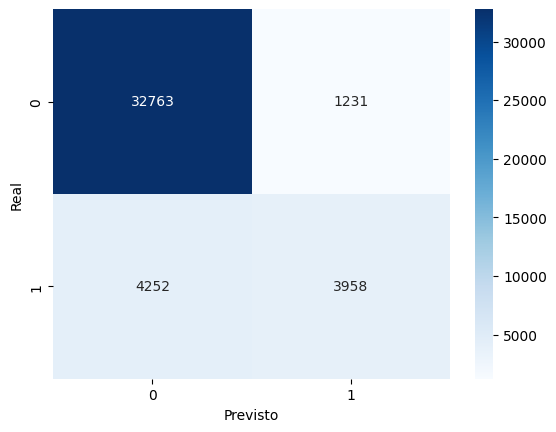

Model training : RandomForest
--- Model metrics ---
Accuracy : 0.8597
Precision : 0.7737
Recall : 0.3943
F1 score : 0.5223


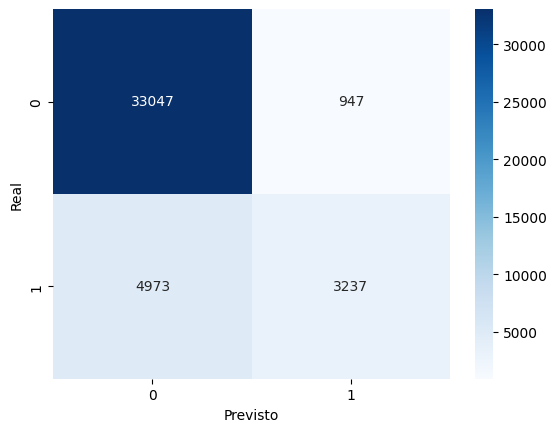

Model training : XGBoost
--- Model metrics ---
Accuracy : 0.8717
Precision : 0.7589
Recall : 0.4988
F1 score : 0.6019


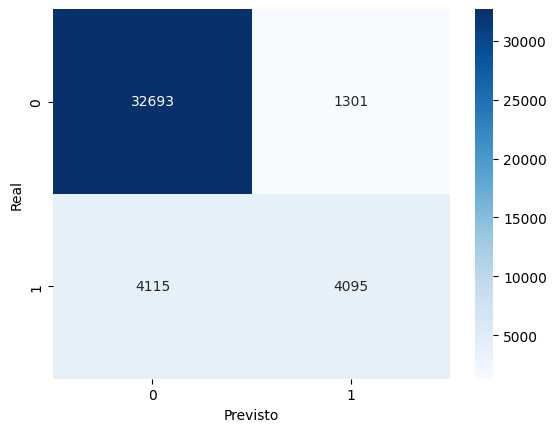

Model training : SGDClassifier
--- Model metrics ---
Accuracy : 0.8639
Precision : 0.8168
Recall : 0.3872
F1 score : 0.5254


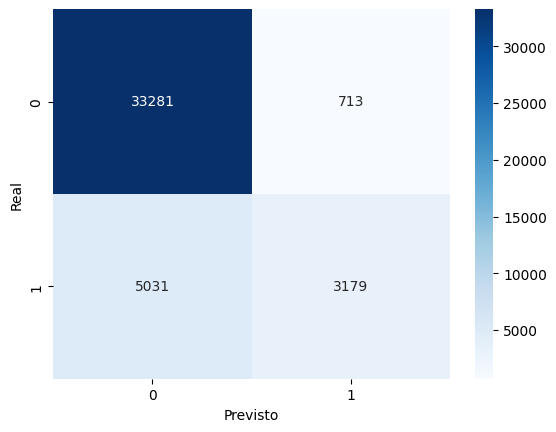

Model training : LogisticRegression
--- Model metrics ---
Accuracy : 0.8701
Precision : 0.7500
Recall : 0.4982
F1 score : 0.5987


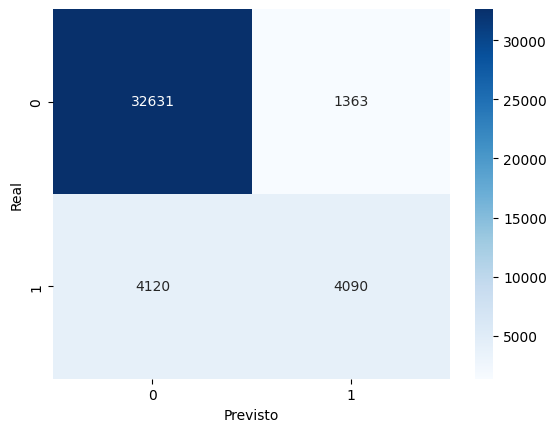

Model training : DecisionTree
--- Model metrics ---
Accuracy : 0.7999
Precision : 0.4859
Recall : 0.4962
F1 score : 0.4910


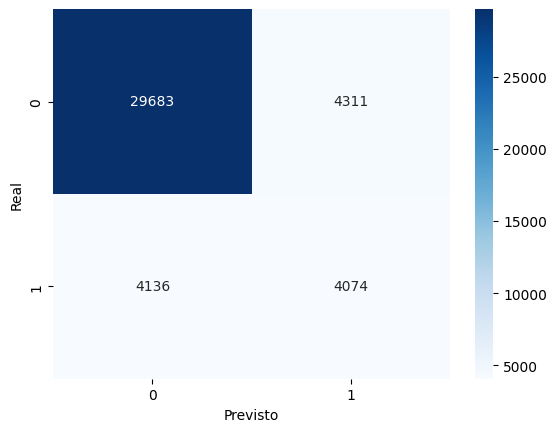

In [69]:
resultados = model_traning(models_dict,df_cleaned,0.3)

# Hyperparameters session

In [75]:
#  Dicionário de Parâmetros
param_grids = {
    'LightGBM': {
        'n_estimators': randint(100, 500),
        'learning_rate': uniform(0.01, 0.2),
        'num_leaves': randint(20, 100),
        'max_depth': randint(3, 10),
        'class_weight': ['balanced']
    },
    'RandomForest': {
        'n_estimators': randint(100, 500),
        'max_depth': randint(3, 20),
        'min_samples_split': randint(2, 11),
        'min_samples_leaf': randint(1, 11),
        'class_weight': ['balanced', 'balanced_subsample']
    },
    'XGBoost': {
        'n_estimators': randint(100, 500),
        'learning_rate': uniform(0.01, 0.2),
        'max_depth': randint(3, 10),
        'subsample': uniform(0.6, 0.4)
    },
    'SGDClassifier': {
        'alpha': uniform(1e-4, 1e-1),
        'penalty': ['l2', 'l1', 'elasticnet'],
        'loss': ['hinge', 'log_loss', 'modified_huber'],
        'class_weight': ['balanced']
    },
    'LogisticRegression': {
        'C': uniform(0.1, 10),
        'solver': ['liblinear', 'lbfgs'],
        'class_weight': ['balanced']
    },
    'DecisionTree': {
        'max_depth': randint(3, 20),
        'min_samples_split': randint(2, 20),
        'criterion': ["gini", "entropy"],
        'class_weight': ['balanced']
    }
}

In [76]:
def model_training_tuned(models_dict:dict, data:pd.DataFrame,test_size:int):
    
    df = data.copy()
    
    # Separação X e y
    X = df.drop('ARRIVAL_DELAY', axis=1)
    y = df['ARRIVAL_DELAY']

    # Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, stratify=y)

    results = {}

    print('=' * 60)
    print(f'Training with Hyperparameter Tuning (RandomizedSearchCV)')
    print(f'X train shape : {X_train.shape} | Y train shape : {y_train.shape}')
    print(f'X test shape : {X_test.shape} | Y test shape: {y_test.shape}')
    print('=' * 60)

    for name, model in models_dict.items():
        print(f'\n Otimizando e treinando: {name}')
        
    
        
        # Verifica se existem parâmetros definidos para este modelo
        if name in param_grids:
            search = RandomizedSearchCV(
                estimator=model,
                param_distributions=param_grids[name],
                n_iter=20,  # Tenta 20 combinações diferentes
                scoring='recall', # Ou 'f1' se os dados forem desbalanceados
                cv=3,       # Cross-validation de 3 folders
                verbose=0,
                random_state=42,
                n_jobs=-1   # Usa todos os processadores
            )
            
            # Treina a busca
            search.fit(X_train, y_train)
            
            # Pega o melhor modelo encontrado
            best_model = search.best_estimator_
            best_params = search.best_params_
            print(f'Melhores parâmetros: {best_params}')
        else:
            # Fallback se não houver grade de parâmetros
            best_model = model
            best_model.fit(X_train, y_train)
            best_params = "Default"

        # Previsão com o MELHOR modelo
        y_pred = best_model.predict(X_test)

        # Métricas
        acc_score = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='binary', zero_division=0)
        recall = recall_score(y_test, y_pred, average='binary', zero_division=0)
        f1 = f1_score(y_test, y_pred, average='binary', zero_division=0)

        print('--- Metrics (Test Set) ---')
        print(f'Accuracy : {acc_score:.4f}')
        print(f'Precision : {precision:.4f}')
        print(f'Recall : {recall:.4f}')
        print(f'F1 score : {f1:.4f}')

        # Salva resultados
        results[name] = {
            'best_model': best_model,
            'best_params': best_params,
            'accuracy': acc_score,
            'precision': precision,
            'recall': recall,
            'f1_score': f1
        }

        # Plot da Matriz de Confusão
        plt.figure(figsize=(4, 3))
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f'Confusion Matrix - {name}')
        plt.xlabel('Previsto')
        plt.ylabel('Real')
        plt.show()

    return results

Training with Hyperparameter Tuning (RandomizedSearchCV)
X train shape : (98476, 139) | Y train shape : (98476,)
X test shape : (42204, 139) | Y test shape: (42204,)

 Otimizando e treinando: LightGBM
[LightGBM] [Info] Number of positive: 19158, number of negative: 79318
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000653 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 855
[LightGBM] [Info] Number of data points in the train set: 98476, number of used features: 137
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Melhores parâmetros: {'class_weight': 'balanced', 'learning_rate': np.float64(0.04410482473745831), 'max_depth': 9, 'n_estimators': 373, 'num_leaves': 23}
--- Metrics (Test Set) ---
Accuracy : 0.8118
Precision : 0.5108
Recall : 0.7688
F1 sco

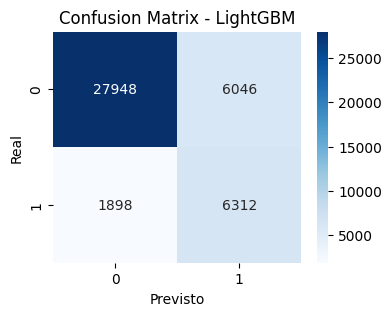


 Otimizando e treinando: RandomForest
Melhores parâmetros: {'class_weight': 'balanced', 'max_depth': 11, 'min_samples_leaf': 7, 'min_samples_split': 3, 'n_estimators': 487}
--- Metrics (Test Set) ---
Accuracy : 0.7975
Precision : 0.4862
Recall : 0.7217
F1 score : 0.5810


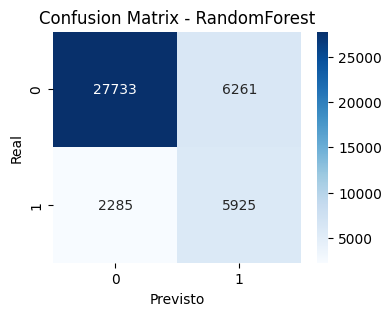


 Otimizando e treinando: XGBoost
Melhores parâmetros: {'learning_rate': np.float64(0.19533177315875885), 'max_depth': 9, 'n_estimators': 403, 'subsample': np.float64(0.7306163075223342)}
--- Metrics (Test Set) ---
Accuracy : 0.8680
Precision : 0.7170
Recall : 0.5306
F1 score : 0.6099


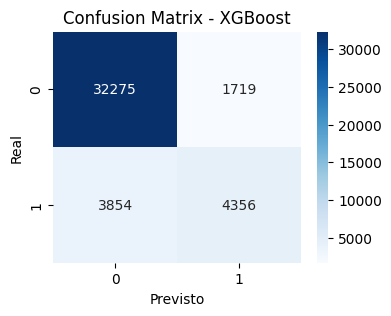


 Otimizando e treinando: SGDClassifier
Melhores parâmetros: {'alpha': np.float64(0.004745041271999773), 'class_weight': 'balanced', 'loss': 'modified_huber', 'penalty': 'elasticnet'}
--- Metrics (Test Set) ---
Accuracy : 0.8091
Precision : 0.5062
Recall : 0.7703
F1 score : 0.6109


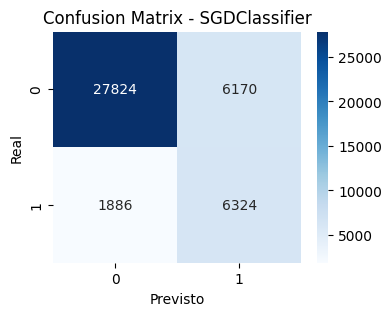


 Otimizando e treinando: LogisticRegression
Melhores parâmetros: {'C': np.float64(8.424426408004217), 'class_weight': 'balanced', 'solver': 'lbfgs'}
--- Metrics (Test Set) ---
Accuracy : 0.8106
Precision : 0.5085
Recall : 0.7811
F1 score : 0.6160


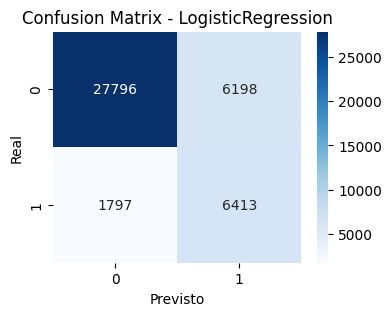


 Otimizando e treinando: DecisionTree
Melhores parâmetros: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 9, 'min_samples_split': 10}
--- Metrics (Test Set) ---
Accuracy : 0.7858
Precision : 0.4671
Recall : 0.7163
F1 score : 0.5655


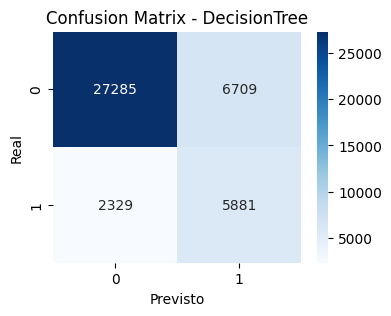

In [77]:
resultados_Hyperparameter = model_training_tuned(models_dict, df_cleaned,0.3)

In [78]:
def plot_model_comparison(results: dict):
    """
    Transforma o dicionário de resultados em um DataFrame
    e plota um gráfico comparativo das métricas.
    """
    
    data_list = []
    for model_name, metrics in results.items():
        data_list.append({
            'Model': model_name,
            'Accuracy': metrics['accuracy'],
            'Precision': metrics['precision'],
            'Recall': metrics['recall'],
            'F1 Score': metrics['f1_score']
        })
    
    df_results = pd.DataFrame(data_list)
    
    # Preparar dados para o Seaborn (formato 'long')
    df_melted = df_results.melt(id_vars='Model', var_name='Metric', value_name='Score')
    
    plt.figure(figsize=(14, 6))
    sns.set_style("whitegrid")
    
    chart = sns.barplot(data=df_melted, x='Model', y='Score', hue='Metric', palette='viridis')
    
    plt.title('Comparação de Performance dos Modelos', fontsize=16)
    plt.ylim(0, 1.1)
    plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0)
    plt.xticks(rotation=45)
    
    for container in chart.containers:
        chart.bar_label(container, fmt='%.2f', padding=3, fontsize=9)

    plt.tight_layout()
    plt.show()
    
    best_model_name = df_results.loc[df_results['F1 Score'].idxmax()]['Model']
    best_f1 = df_results['F1 Score'].max()
    
    print(f"\n O Modelo Campeão (baseado no F1 Score) foi: {best_model_name}")
    print(f"   Com F1 Score de: {best_f1:.4f}")
    
    return df_results

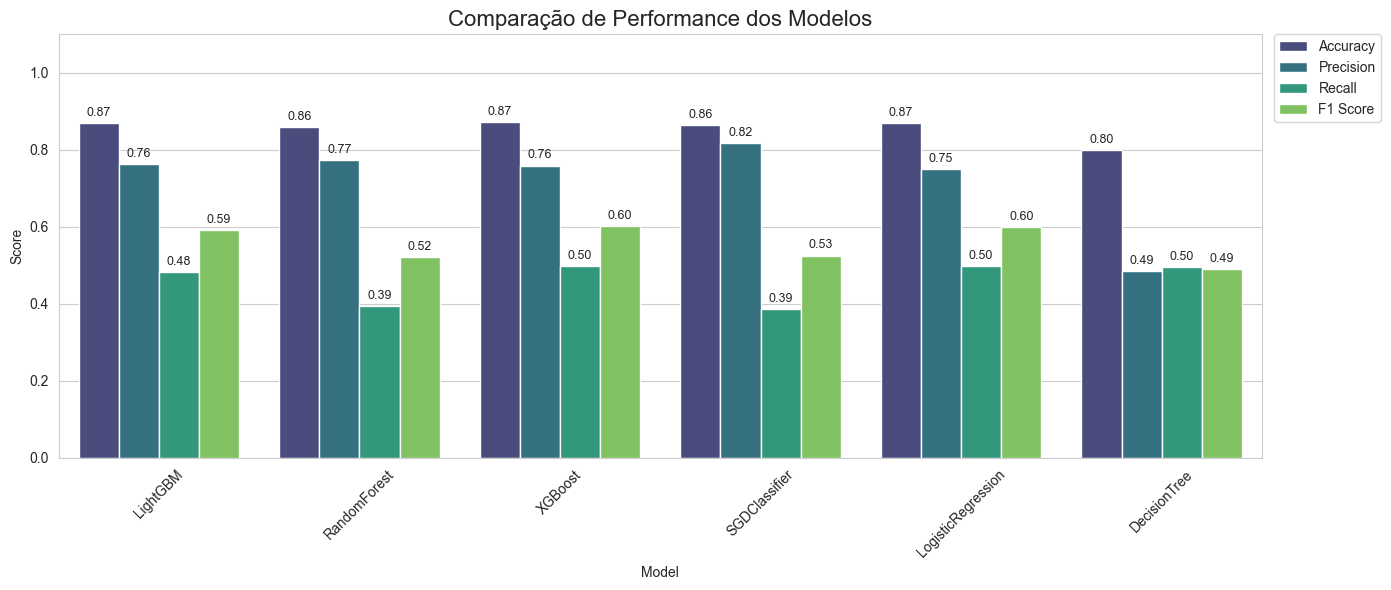


 O Modelo Campeão (baseado no F1 Score) foi: XGBoost
   Com F1 Score de: 0.6019


,Model,Accuracy,Precision,Recall,F1 Score
0,LightGBM,0.87,0.76,0.48,0.59
1,RandomForest,0.86,0.77,0.39,0.52
2,XGBoost,0.87,0.76,0.50,0.60
3,SGDClassifier,0.86,0.82,0.39,0.53
4,LogisticRegression,0.87,0.75,0.50,0.60
5,DecisionTree,0.80,0.49,0.50,0.49


In [79]:
plot_model_comparison(resultados)

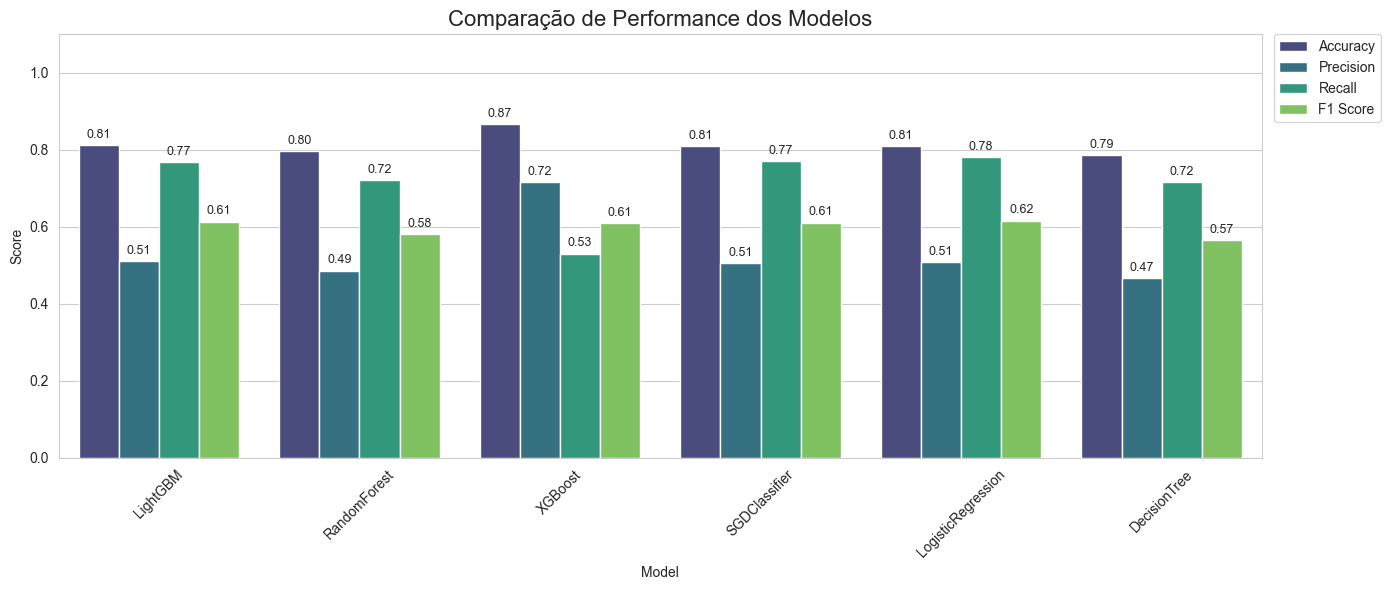


 O Modelo Campeão (baseado no F1 Score) foi: LogisticRegression
   Com F1 Score de: 0.6160


,Model,Accuracy,Precision,Recall,F1 Score
0,LightGBM,0.81,0.51,0.77,0.61
1,RandomForest,0.80,0.49,0.72,0.58
2,XGBoost,0.87,0.72,0.53,0.61
3,SGDClassifier,0.81,0.51,0.77,0.61
4,LogisticRegression,0.81,0.51,0.78,0.62
5,DecisionTree,0.79,0.47,0.72,0.57


In [80]:
plot_model_comparison(resultados_Hyperparameter)